<a id = 'top'></a>

<h1><center>Lending Club Case Study</center></h1>

<h2>Business Objective: Determining the Driving Factors for Loan Default</h2>

The organisation Lending Club acts as a peer-to-peer company and matches possible investors with available loan applicants. As a part of it's Application Screening Process, it wants to understand what can be the possible diriving factors behind Loan Defaulting. The Company can ustilise these inputs to identify probable risky applicants and decide whether to accept/reject the application/or to review the loan amount to minimise the risk.

**Note: We have created a __Table of Contents__ with hyperlinks to various sections of the page for ease of access. Please use the 'Go Back to Top' link at the end of each section to come back to this top section*

### Table of Contents

1. [First Look at the Data](#chapter1)
    - [Objective](#chapter1)
    - [Data Types and Missing Value Count](#chapter1.1)
    - [Visualisation of Missing Value Percentages](#chapter1.2)
    - [Variance and Unique Value related insights](#chapter1.3)
    - [Inference](#chapter1.4)
    
2. [Business Understanding of Variables](#chapter2)
3. [Data Cleaning](#chapter3)
4. [Univariate Analysis](#chapter4)
    - [Objective](#chapter4)
    - [Univariate Plots](#chapter4.1)
    - [Observation and Inference](#chapter4.2)
5. [Segmented Univariate and Bivariate Analysis](#chapter5)
    - [Objective](#chapter5)
    - [Segmented Univariate Analysis](#chapter5.1)
    - [Bivariate Analysis: Boxplots](#chapter5.2)
    - [Bivariate Analysis: Binned Barplots](#chapter5.3)
    - [Observation and Inference](#chapter5.4)
6. [Multivariate Analysis](#chapter6)
    - [Objective](#chapter6)
    - [Multivariate Plots](#chapter6)
    - [Observation and Inference](#chapter6.2)
7. [Final Inference and Conclusion](#chapter7)

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import datetime
import re
import warnings
warnings.simplefilter("ignore")
from pandas.api.types import  is_object_dtype, is_numeric_dtype
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

### Loading The Data

In [2]:
df_loan = pd.read_csv("loan.csv")
df_loan.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

***

<a id = 'chapter1'></a>
# 1. First Look at the Data

### **Objective**

- The Number of Features
- The Data Type of the Columns
- The Null-Value Percentage
- The Variance in the Column values

In [3]:
print(f"Shape of the Data: {df_loan.shape}")

Shape of the Data: (39717, 111)


<a id = 'chapter1.1'></a>

#### Null Value Count and Data Types of The Columns

In [4]:
df_loan.info(verbose = 2, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### There are certain columns with 0 non-null values, and some columns with a certain percentage of null values of the total count. Let's look at the percentage count of null values to get a clearer picture

In [5]:
null_value_df = pd.DataFrame(np.round(df_loan.isna().mean() * 100, 2), columns = ['null_value_percentage']).reset_index().rename(columns = {'index': 'columns'})
null_value_df

,columns,null_value_percentage
0,id,0.00
1,member_id,0.00
2,loan_amnt,0.00
3,funded_amnt,0.00
4,funded_amnt_inv,0.00
5,term,0.00
6,int_rate,0.00
7,installment,0.00
8,grade,0.00
9,sub_grade,0.00


In [6]:
print(f"Total Columns with 0 null values: {null_value_df[null_value_df['null_value_percentage'] == 0].shape[0]}")
print(f"Total Columns with more than 30% null values: {null_value_df[null_value_df['null_value_percentage'] > 30].shape[0]}")
print(f"Total Columns with 100% null values: {null_value_df[null_value_df['null_value_percentage'] == 100].shape[0]}")


Total Columns with 0 null values: 43
Total Columns with more than 30% null values: 58
Total Columns with 100% null values: 54


<a id = 'chapter1.2'></a>

#### We look at a heatmap distribution to find out the percentage null-value count for each loan-status typr

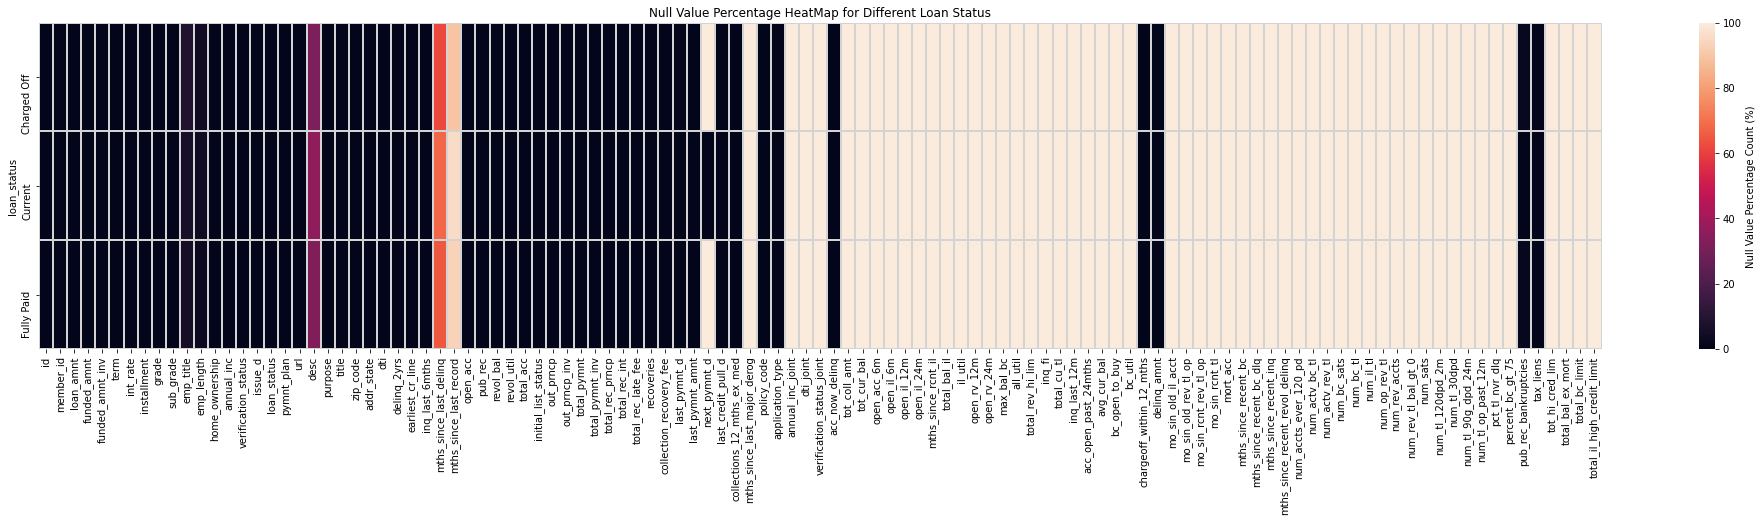

In [7]:
df_null_value_grouped = (df_loan.groupby(['loan_status']).apply(lambda x: x.isna().mean() * 100))

plt.figure(figsize = (35, 6))
plt.title("Null Value Percentage HeatMap for Different Loan Status")
sns.heatmap(df_null_value_grouped, 
            cbar_kws={'label': 'Null Value Percentage Count (%)'}, 
            linecolor = 'lightgrey', linewidth = 1)
plt.show()

<a id = 'chapter1.3'></a>

#### Variance in Numeric Columns

In [8]:
df_variance = pd.DataFrame()
cols_list = [col for col in df_loan.columns.tolist() if is_numeric_dtype(df_loan[col])]
df_variance['columns'] = cols_list
df_variance['unique_count'] = [df_loan[col].nunique() for col in cols_list]
df_variance.head()

,columns,unique_count
0,id,39717
1,member_id,39717
2,loan_amnt,885
3,funded_amnt,1041
4,funded_amnt_inv,8205


#### Variance in Categorical Columns


In [9]:
df_variance_cat = pd.DataFrame()
cols_list_cat = [col for col in df_loan.columns.tolist() if is_object_dtype(df_loan[col])]
df_variance_cat['columns'] = cols_list_cat
df_variance_cat['unique_count'] = [df_loan[col].nunique() for col in cols_list_cat]
df_variance_cat.head()

,columns,unique_count
0,term,2
1,int_rate,371
2,grade,7
3,sub_grade,35
4,emp_title,28820


In [10]:
print(f"Total Columns with only 1 unique value count: {df_variance[df_variance['unique_count'] == 1].shape[0] + df_variance_cat[df_variance_cat['unique_count'] == 1].shape[0]}")
print(f"Total Numeric Columns with only 1 unique value count: {df_variance[df_variance['unique_count'] == 1].shape[0] }")
print(f"Total Numeric Columns with less than 5 unique value count: {df_variance[df_variance['unique_count'].between(1,5)].shape[0] }")
print(f"Total Categorical Columns with high cardinality (#unique values): {df_variance_cat[df_variance_cat['unique_count'] > 500].shape[0]}")

Total Columns with only 1 unique value count: 9
Total Numeric Columns with only 1 unique value count: 6
Total Numeric Columns with less than 5 unique value count: 8
Total Categorical Columns with high cardinality (#unique values): 7


<a id = 'chapter1.4'></a>

### Inference

- Out of The Total 111:
    + **54** columns have **100% null values**
    + **58** columns have **more than 30% null values**
    + **43** columns have **no null values**.
    + **87** columns are numeric
    + **24** columns are categorical
    + Some columns like 'int_rate', 'emp_length', 'revol_util' etc. are marked as categorical/object type whereas they are better treated as numeric type.
    + Total **9** columns with only 1 unique value present, out of which **6** are numeric
    + Around 7 categorical columns with very high cardinality (>500 unique values), although 'revol_util' will be converted to numeric datatype, but rest can be ignored as their analysis/encoding will be difficult to perform.

<div>These inferences give us an idea about which columns can be ignored purely based on the data present in them (data-driven approach).</div>
<div>Further we will also look at columns which may be relevant/irrelevant based on the business objective (business-driven approach).</div>

[Go Back to Top](#top)

***

<a id = 'chapter2'></a>
# 2. Understanding the Different Types of Variables

#### Objective

- Understanding the Customer Attribute Metadata
- Understanding the Loan Attributes
- Understanding the Customer Behaviour Attributes

#### Customer Attribute Metadata

These are variables which can give us demographic info about the customers, like employment length, employment title, location (address, zip code) etc.

### Loan Attribute Data

These are variables which are directly related to the loan application, e.g loan_amount, funded_amount_by_investors, interest_rate, grade/sub-grade of loan, term etc. 

### Customer Behaviour Attributes

These are variables related to the customer's financial behaviour. These are again divided into pre-approval behaviour and post-approval behaviour
  - **Pre-loan Approval Behaviour:**   acc_now_delinquent, revol_util etc.
  - **Post-loan Approval Behaviour:** total_payment, recoveries, last_payment_date, next_payment_date etc. These factors can be straigtaway discarded as this info is not available at the time of loan application

Based on the Above segmentation, we have created a list of columns which can be driving factors purely based on business understanding. 

In [11]:
important_columns = ['loan_amnt', 'funded_amnt',  'funded_amnt_inv', 'term',
                     'int_rate', 'installment', 'grade', 'sub_grade',
                     'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                     'issue_d', 'loan_status', 'purpose', 'addr_state',
                     'dti', 'revol_util', 'total_acc',
                     ]

[Go Back to Top](#top)

***

<a id = 'chapter3'></a>

# 3. Data Cleaning

#### Based on all these inferences, let's perform some data preprocessing task to get clean data for further analysis.

In [12]:
def preprocess_data(df):
    """This function preprocesses the input data
    Steps:
    - Remove observations where the loan status is 'Current'
    - Convert numeric columns which were flagged as object dtype
    - Strip categorical columns off whitespaces
    - Remove columns with only 1 unique value
    - Remove columns with more than 30% null values
    - Consider only important columns defined based on business understanding
    - Clean the emp_length column
    
    :args: df -> pd.DataFrame()
    
    :returns: pd.DataFrame()
    
    """
    df = df.copy()
    df = df[~df['loan_status'].str.contains('Current')]     #Loans with status 'Current' are not relevant to the business use-case
    
    for col in df.columns.tolist():
        if is_object_dtype(df[col]):
            df[col] = df[col].str.strip(" ")     #strip whitespaces from object column
            df[col] = df[col].str.strip("%")     #strip percentage symbol (specifically useful for interest rate column)
            
        if df[col].nunique() == 1:
            df.drop(col, axis= 1, inplace = True)     #drop columns which contain only 1 unique value (both numerical and categorical)
        
    
    df['term'] = df['term'].apply(lambda x: x.strip("months").strip(" "))     #convert the column 'term' into a numeric variable
    df['term'] = df['term'].astype(int)
    df['int_rate'] = df['int_rate'].astype(float)     #convert interest rate column into numeric
    df['revol_util'] = df['revol_util'].astype(float)     #convert revol_util to numeric
    columns_to_keep = df.columns[df.isna().sum()/df.shape[0] * 100 <= 30]     #consider columns which contain less than or equal to 30% missing values
    df = df[important_columns]     #filter only important columns
    
    #cleaning the emp_length column
    df['emp_length'] = df['emp_length'].fillna("99")     #need to impute the nan values for using regex
    df['emp_length'] = df['emp_length'].apply(lambda x: re.findall(r'\d+', x)[0])      #find the numeric value associated with the employment year
    df['emp_length'] = df['emp_length'].astype("int64")
    df['emp_length'] = df['emp_length'].replace(99, np.nan)     #convert back to nan which will be imputed later based on need and appropriate technique
    
    return df

In [13]:
df_preprocessed = preprocess_data(df_loan)
df_preprocessed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,total_acc
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.7,9
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.4,4
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98.5,10
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21.0,37
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,28.3,12


In [14]:
df_preprocessed.shape

(38577, 19)

[Go Back to Top](#top)

***

<a id = 'chapter4'></a>

# 4. Univariate Analysis

In [15]:
def plot_univariate_charts(df, column):
    """This function plots multiple figures
    as a part of univariate analysis.
    - For continuous/discrete numeric variables, it plots the distribution and the boxplot
    - For categorical variables, it plots the percentage pie-chart and the bar plot.
    
    :args: df: pd.DataFrame
    :args: column: String
    """
    fig, axs = plt.subplots(1,2, figsize = (30, 5), dpi = 90)
    fig.suptitle(f" Univariate Plots: {column} ", fontsize = 15,)
    
    if is_numeric_dtype(df[column]):
        sns.kdeplot(data = df, x = column, ax = axs[0])
        sns.boxplot(data = df, x = column, ax = axs[1])
        
        axs[0].set_title(f"KDE Plot: {column}")
        axs[1].set_title(f"Boxplot: {column}")
        axs[0].grid()
        axs[1].grid()
    elif is_object_dtype(df[column]):
        df_grouped = df.groupby(column, as_index = False).size()
        explode_list = [0]* df_grouped.shape[0]
        explode_list[np.argmax(df_grouped['size'].tolist())] = 0.1
        axs[0].pie(labels = df_grouped[column].tolist(), x= df_grouped['size'].tolist(), autopct='%.0f%%', explode = explode_list)
        sns.barplot(data = df_grouped, x = column, y = 'size', ax = axs[1])
        
        axs[0].set_title(f"Pie Chart: {column}")
        axs[1].set_title(f"Barplot: {column}")
        axs[1].grid()
        axs[1].tick_params(rotation = 45)

We First Look at the distribution of data all at once and then make inference later.

[Go to The Observations/Inference Cell For this Section](#chapter4.2)

<a id = 'chapter4.1'><h1>Univariate Plots</h1></a>

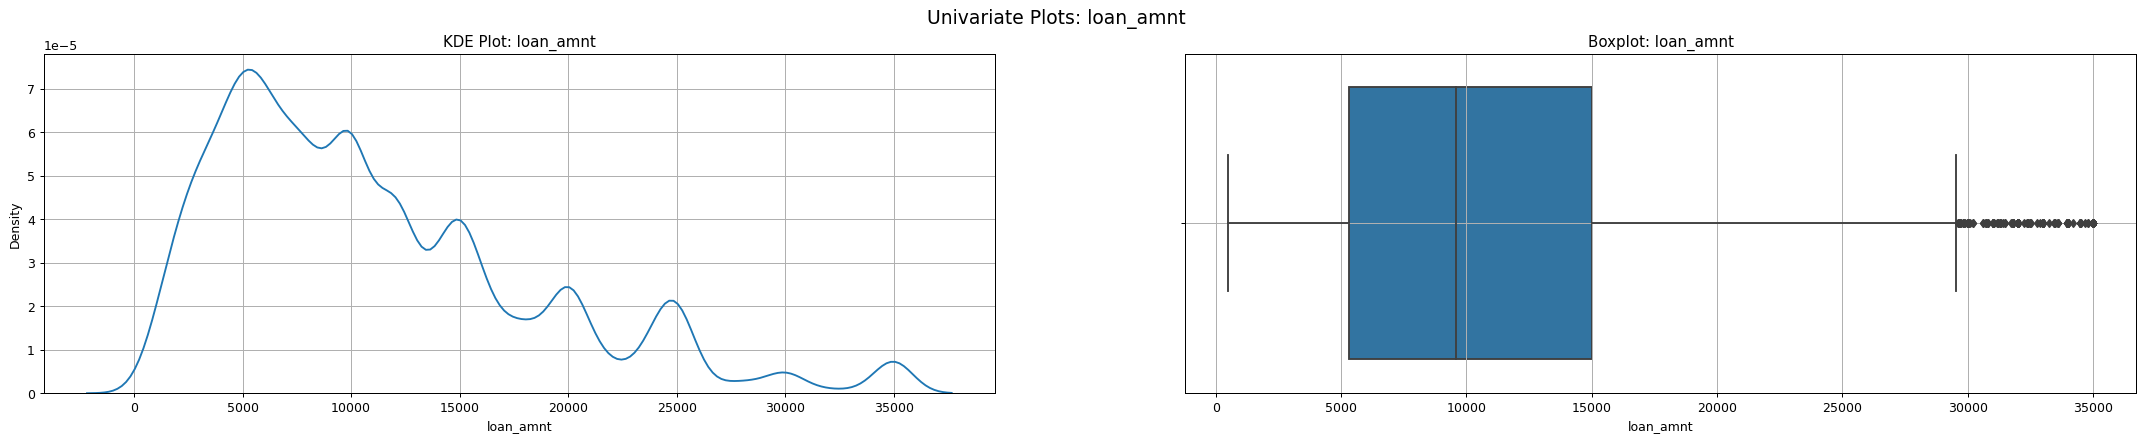

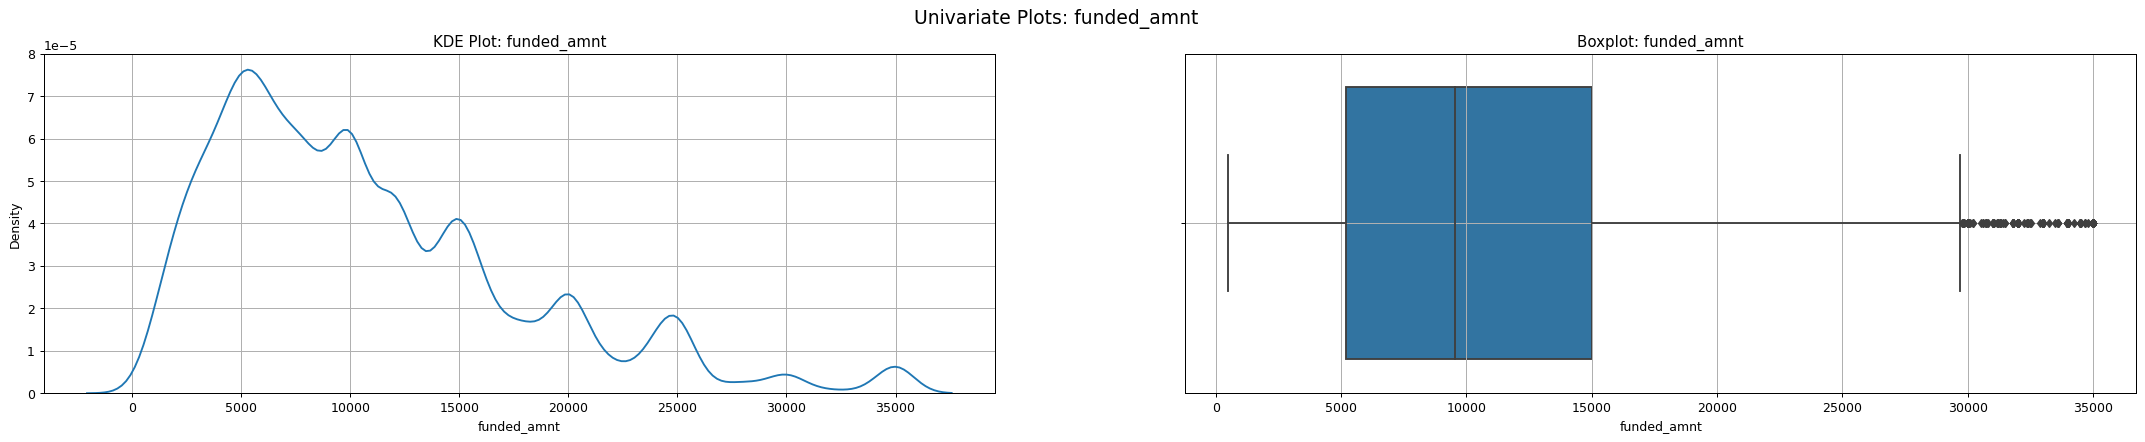

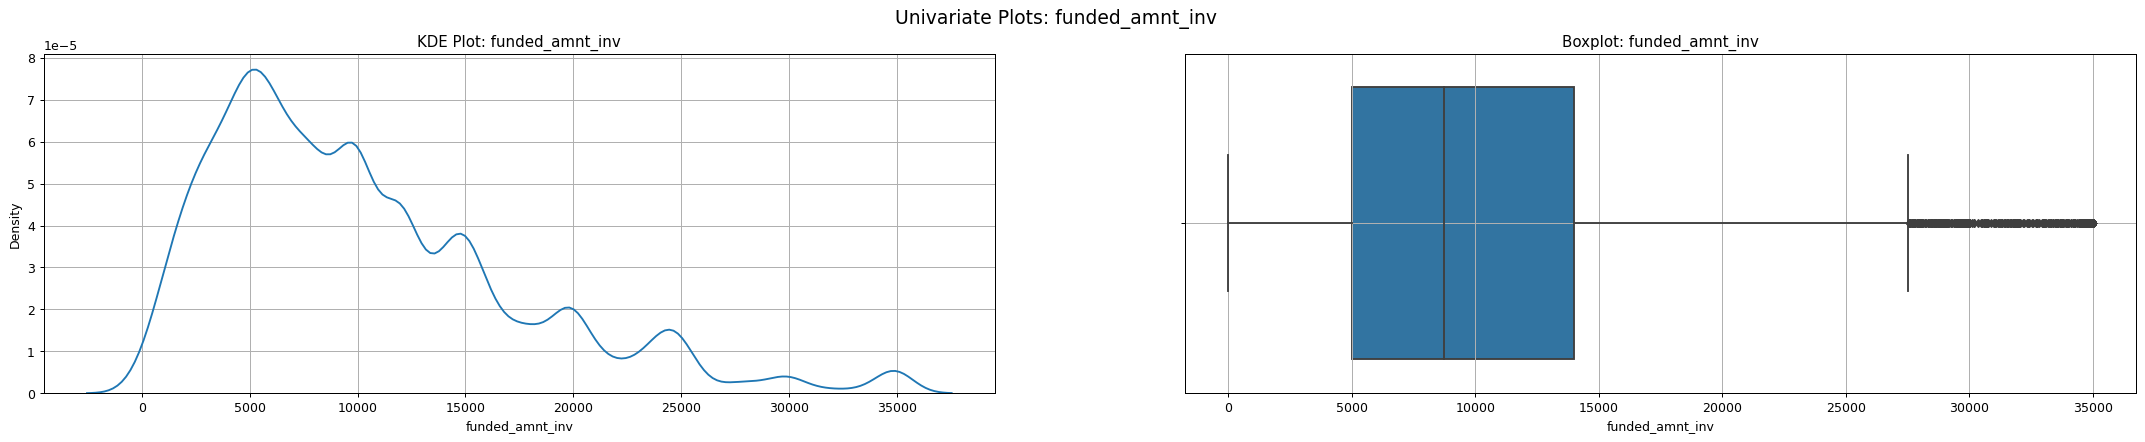

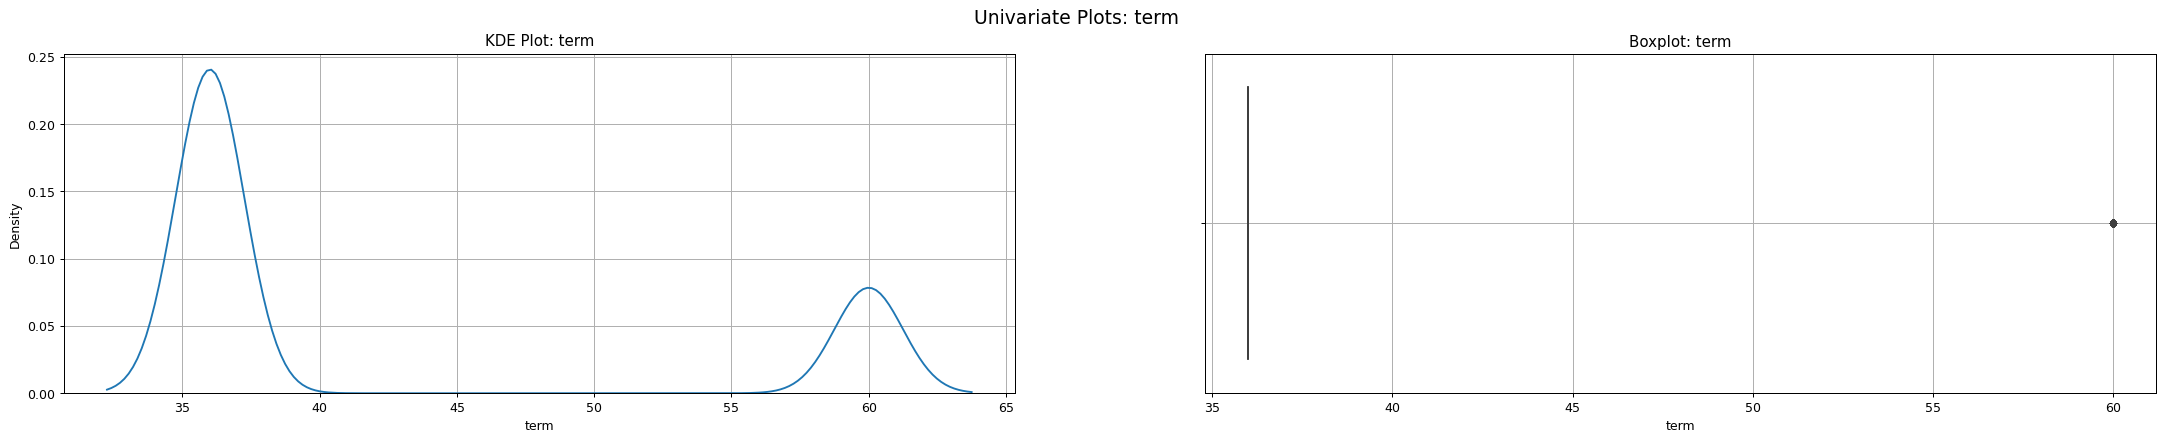

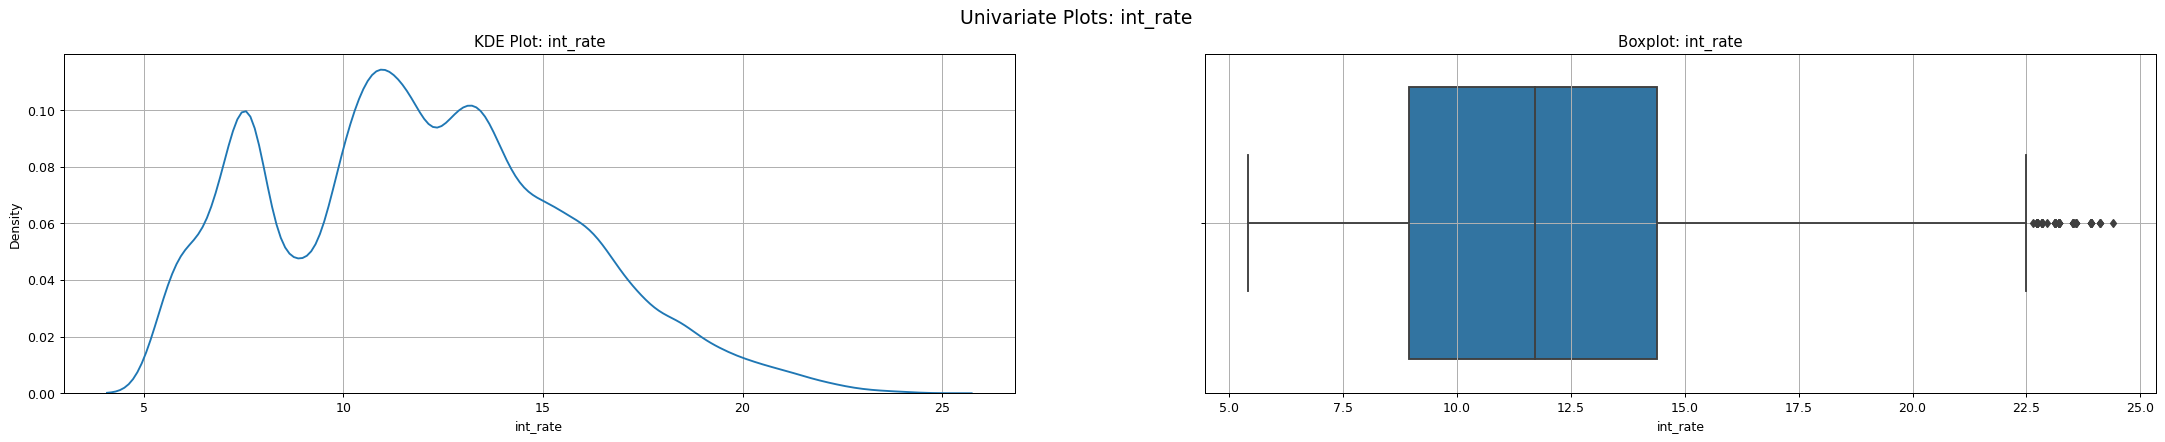

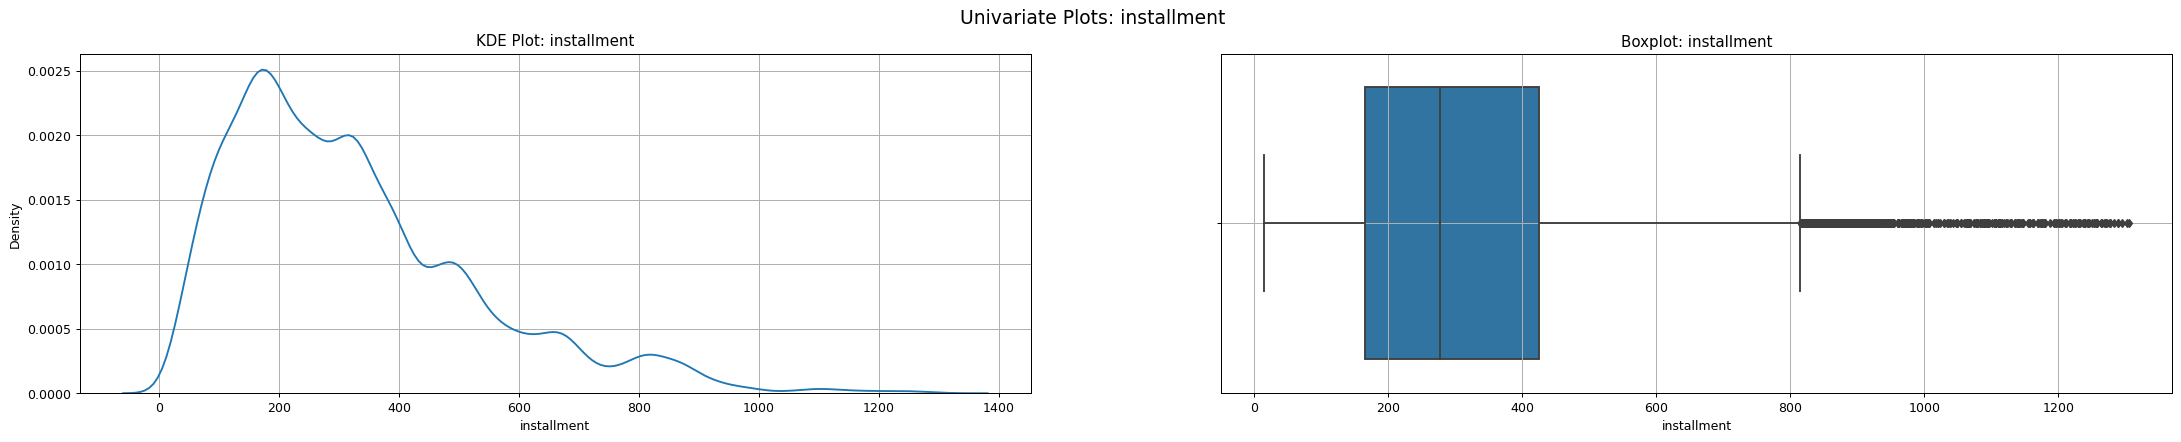

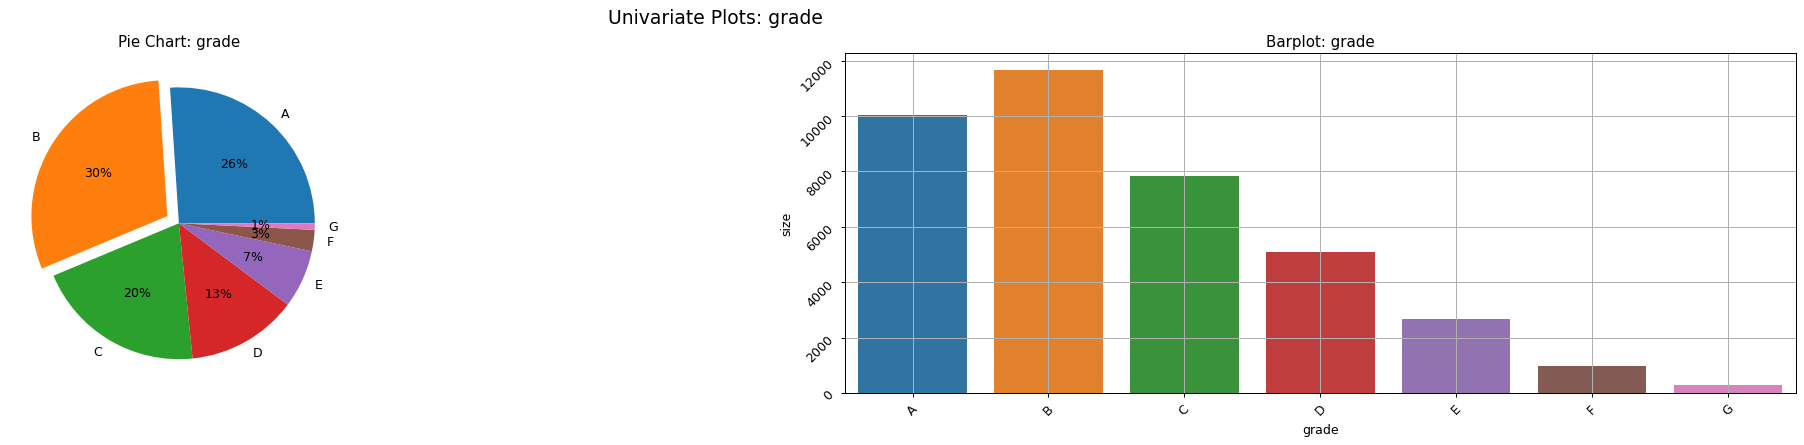

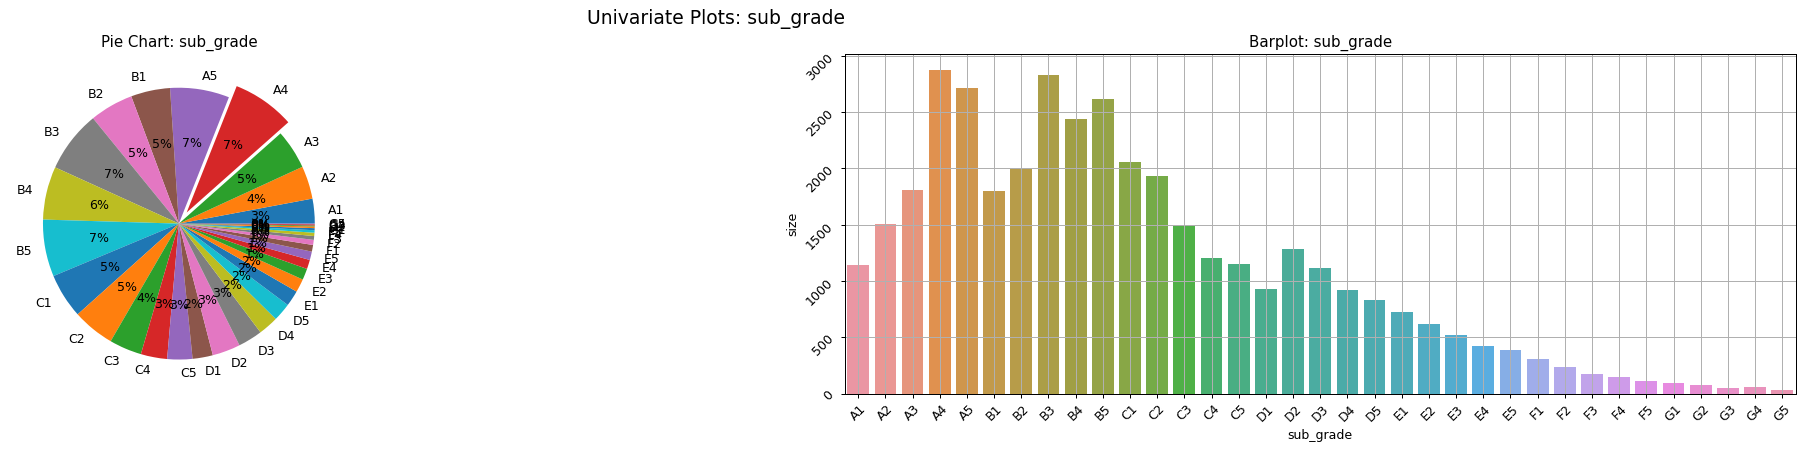

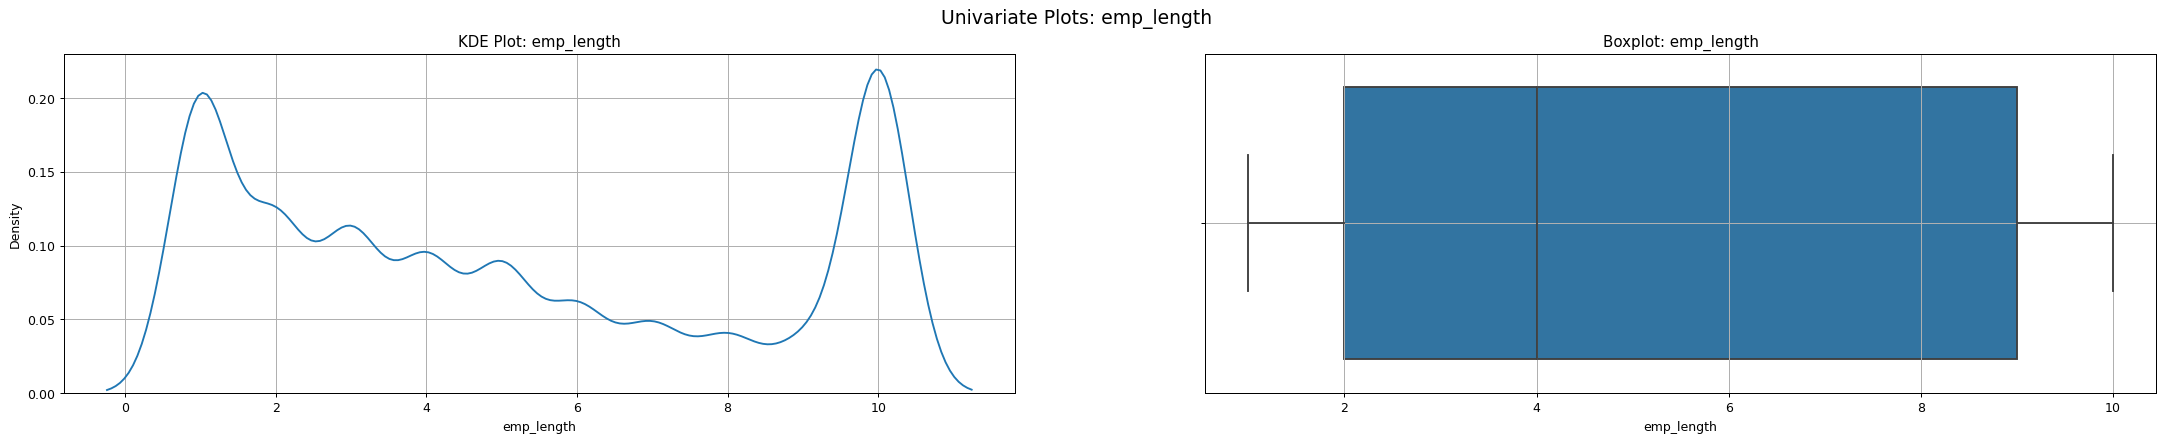

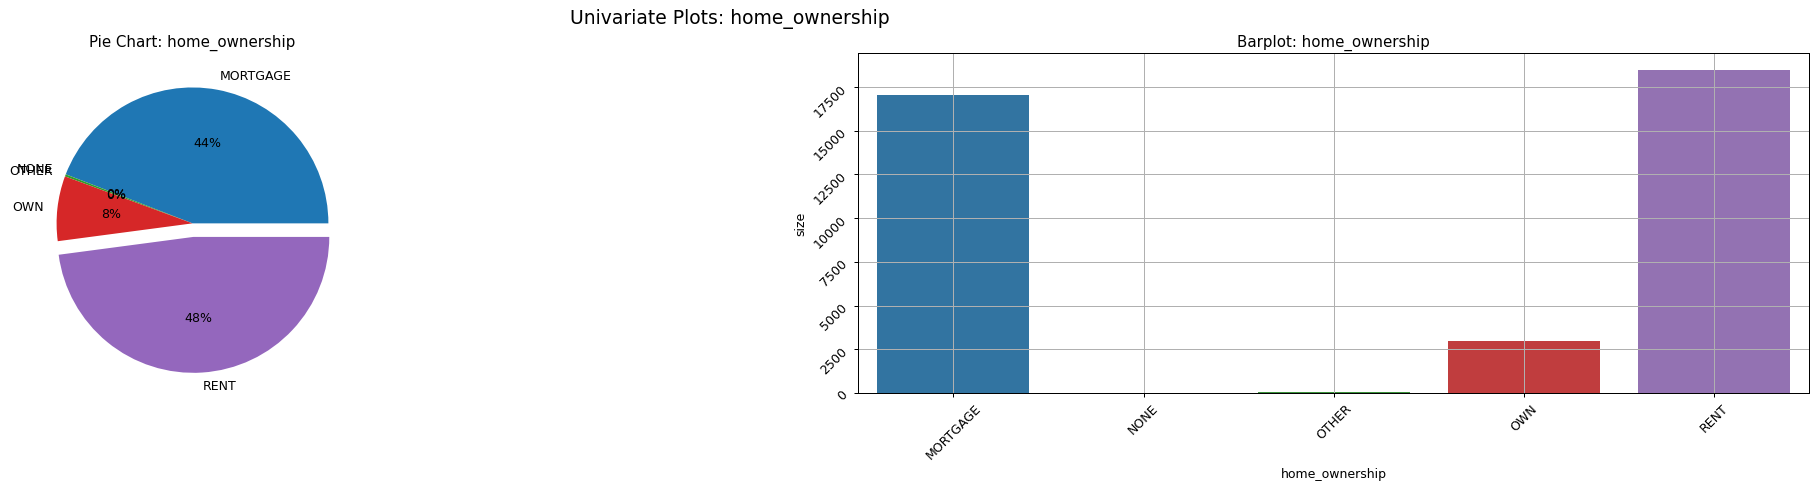

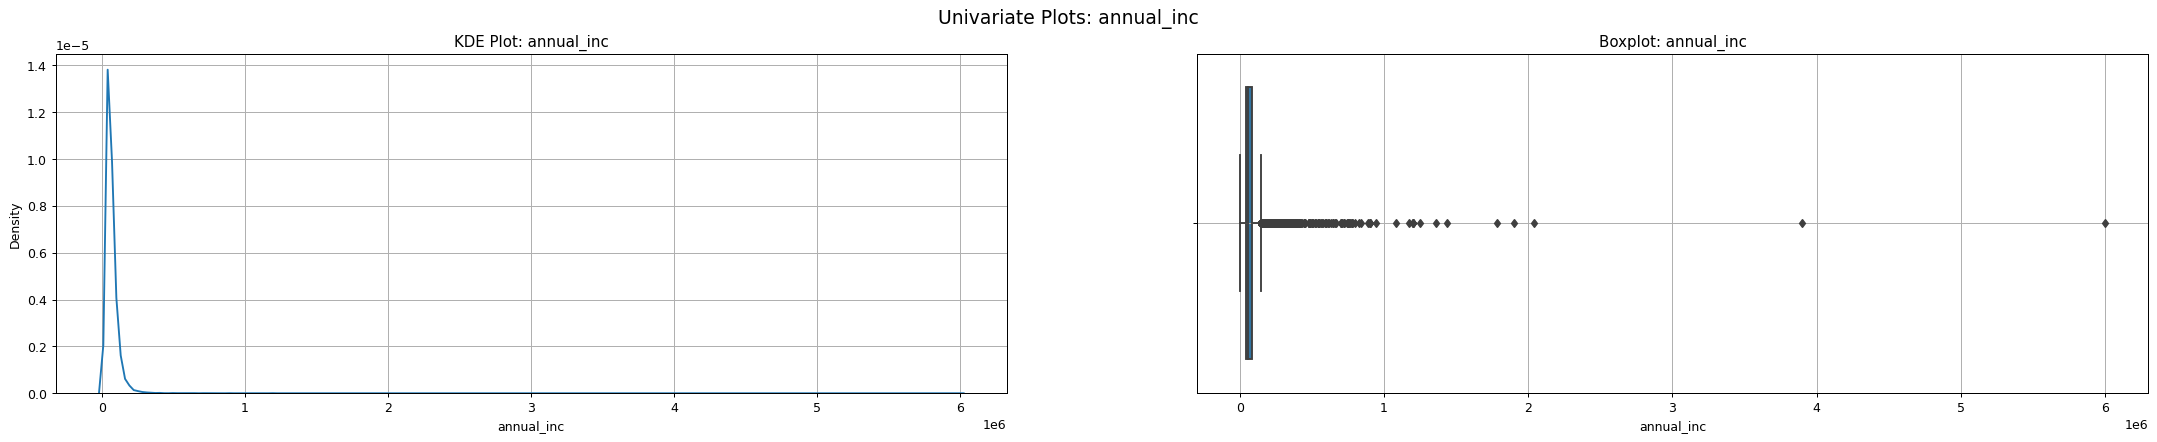

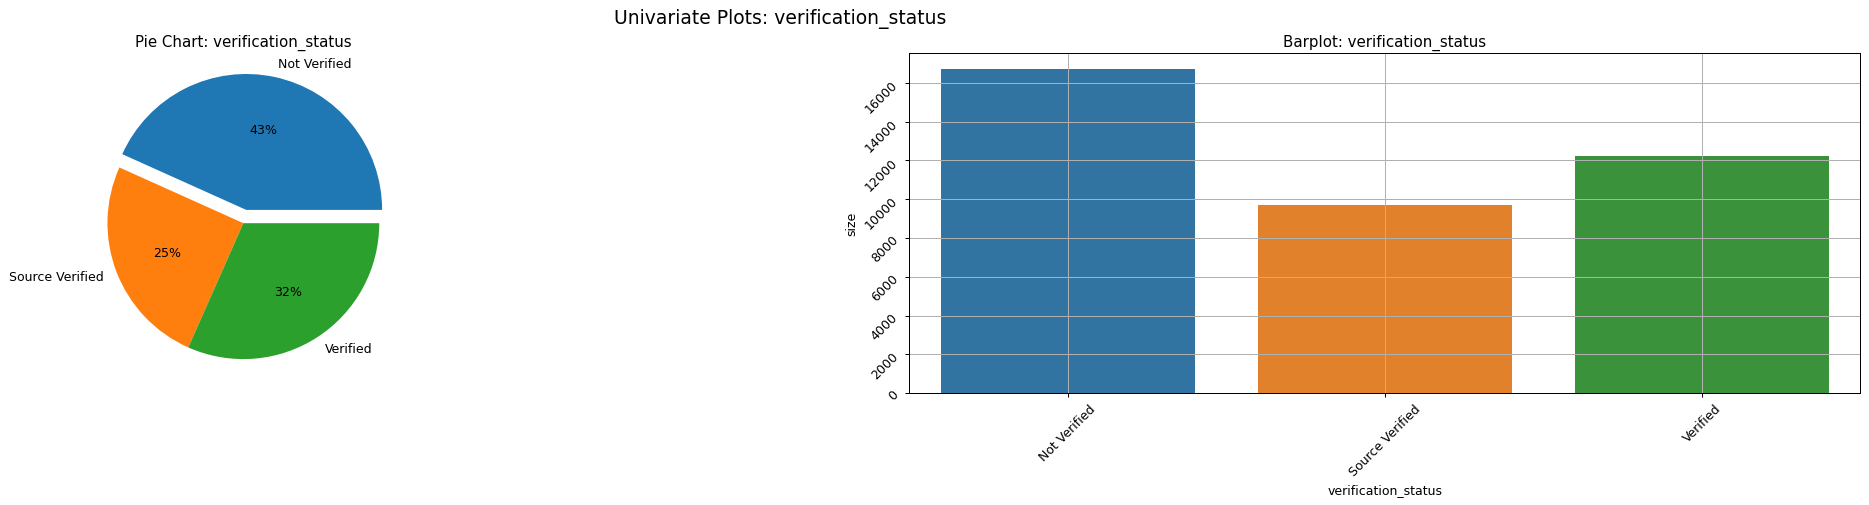

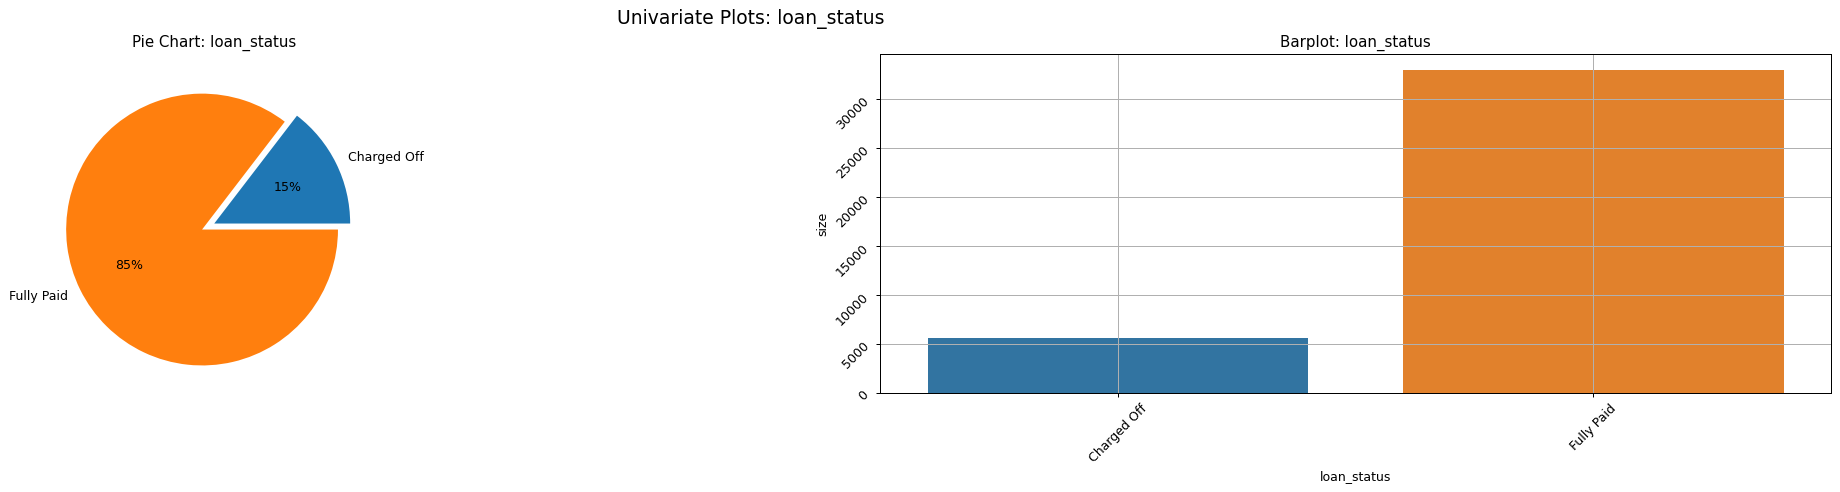

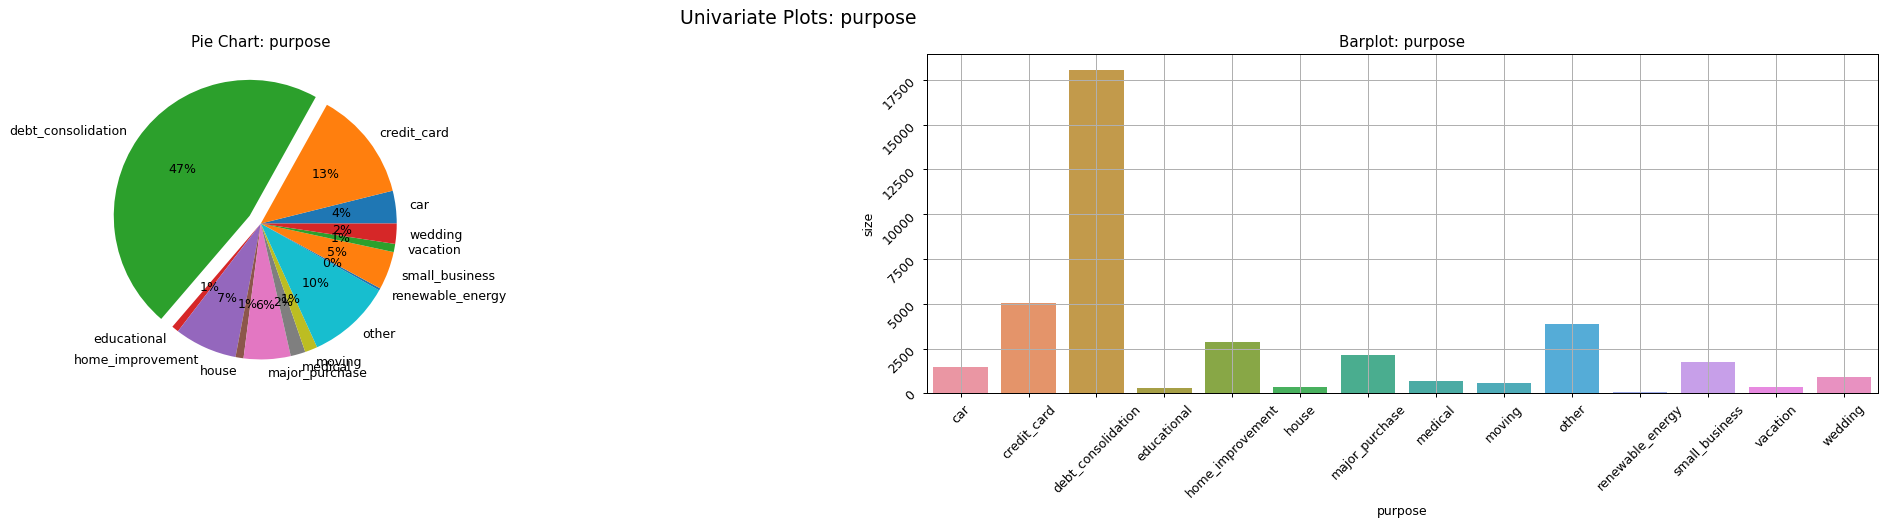

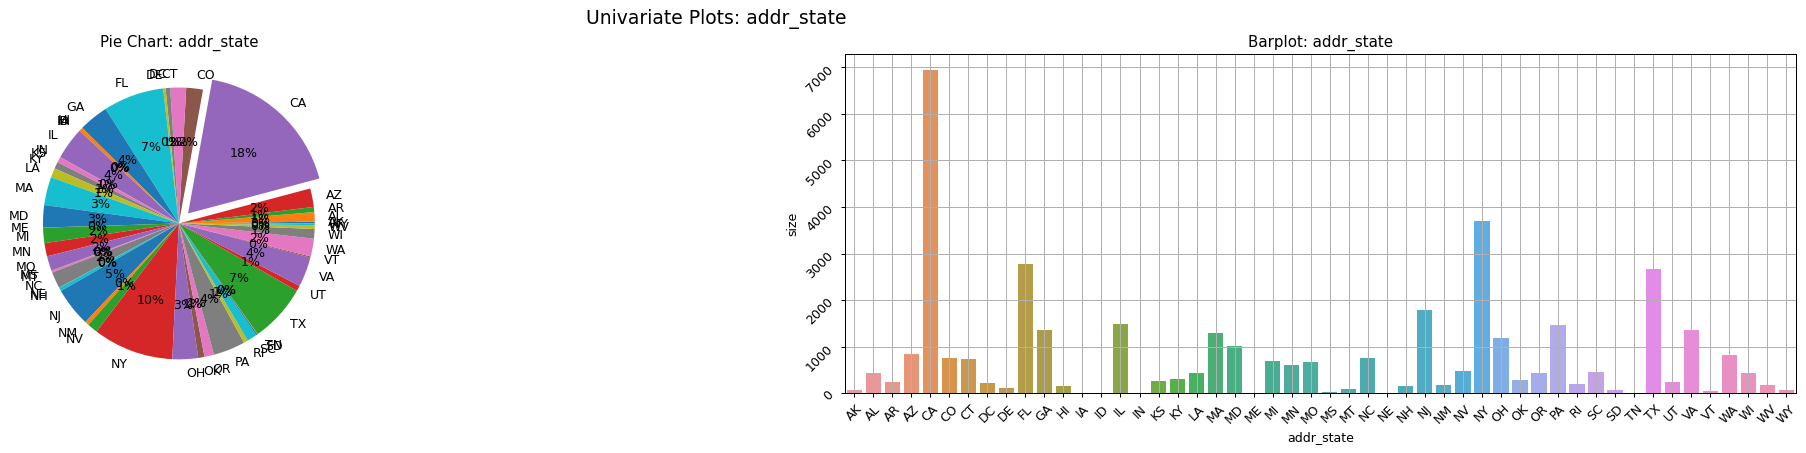

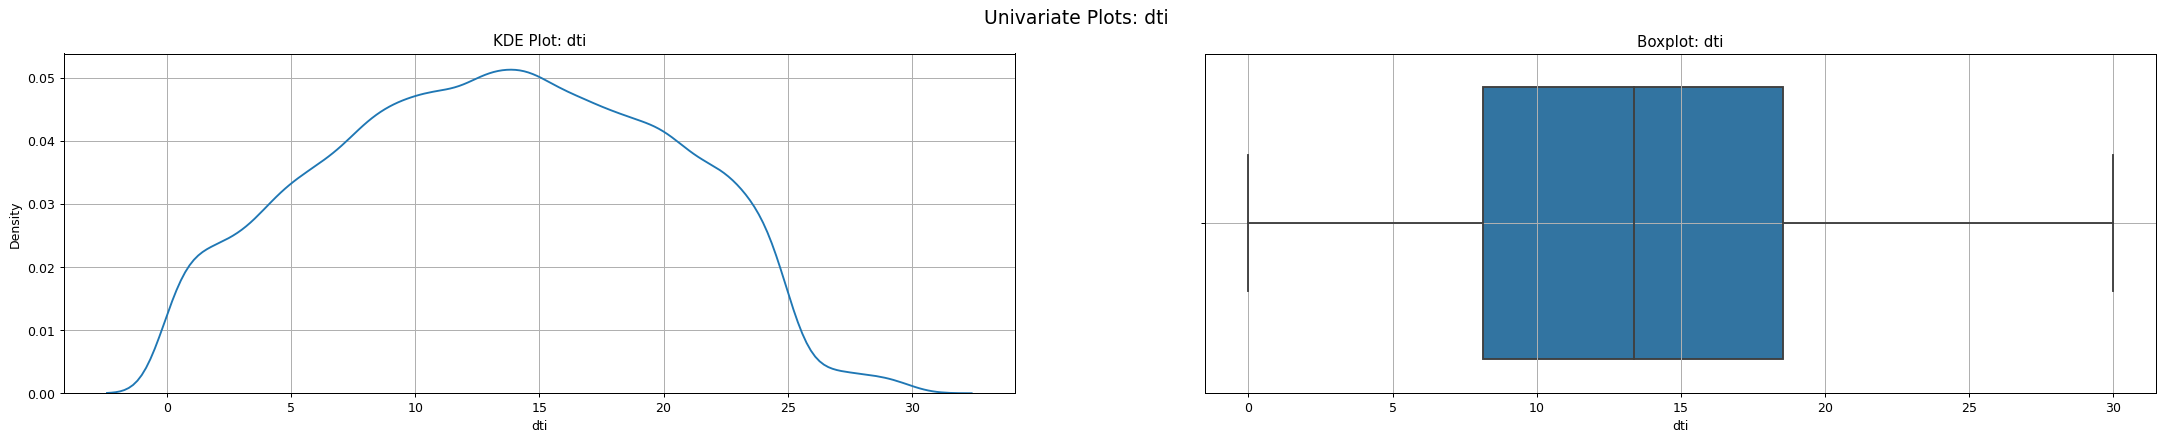

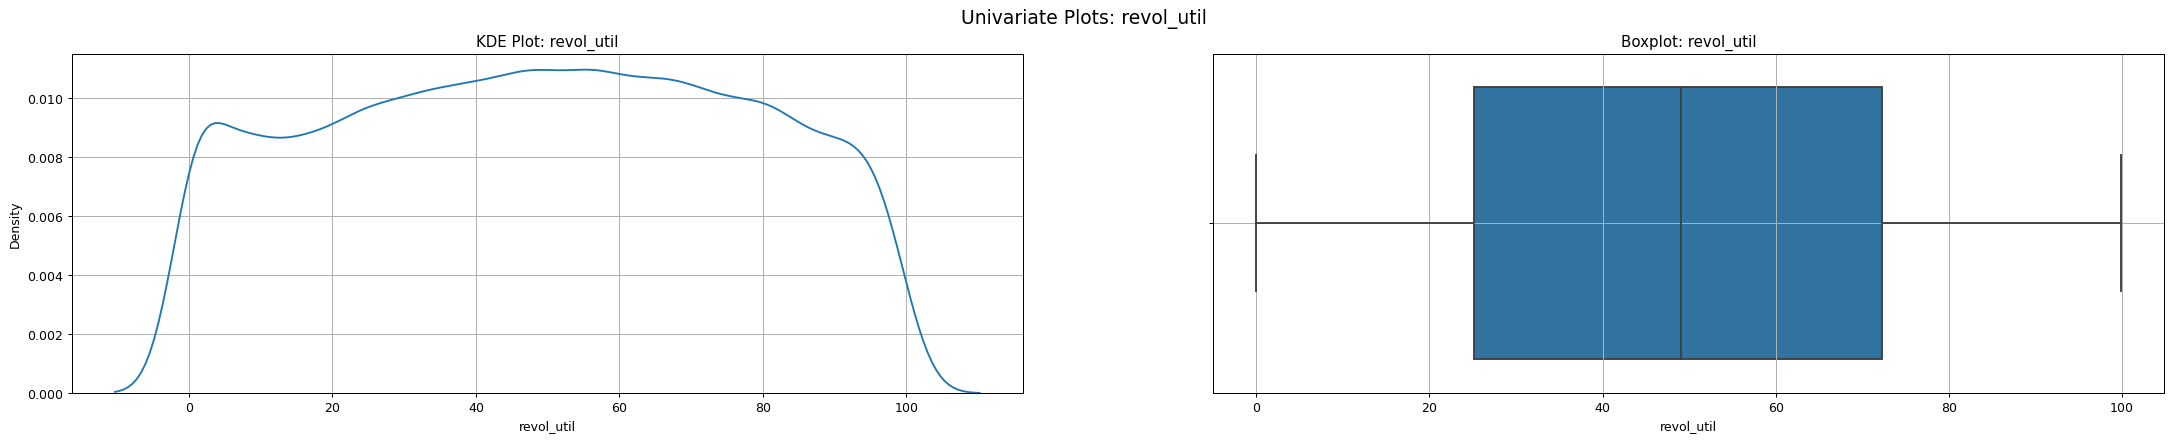

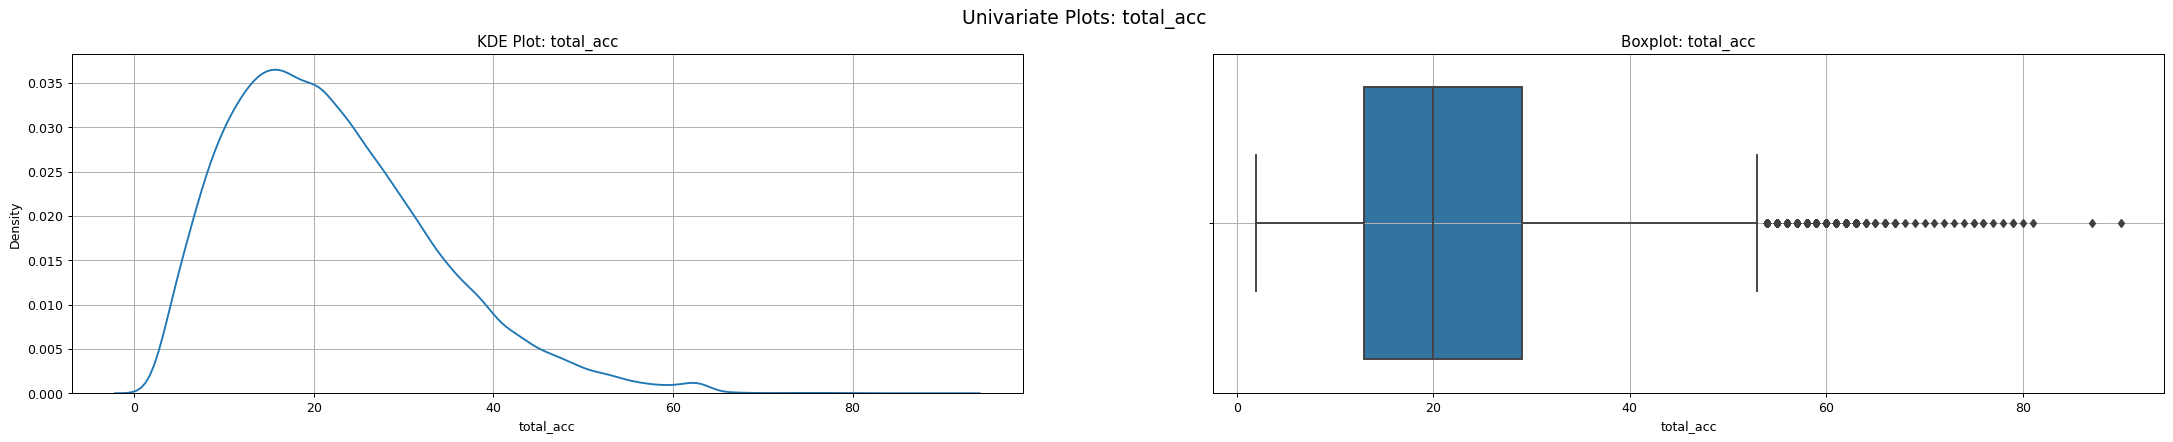

In [16]:
for column in df_preprocessed.columns.tolist():
    if column != 'issue_d':
        plot_univariate_charts(df_preprocessed, column)

<a id = 'chapter4.2'></a>
# Observation and Inference

- Majority of the Loans applied fall in the range 5k-15k
- Loans are given at a term of 36 months and 60 months (Mostly 36 months)
- Majority of loans fall in the A, B, C grade (and corresponding sub-grades).
- Majority of Applicants either have a 0-1 year employment experience or 10+ year experience.
- Majority of the Applicants either live Rent of Mortgaged Home.
- For 43% of the loans, the Income Source of the applicant is Not Verified
- Around **85%** of the loans have been Fully Paid while only **15%** have been charged off.
- 47% of the loans applied are for the purpose of Debt Consolidation.

[Go Back to Top](#top)

***

<a id = 'chapter5'></a>
# 5. Segmented Univariate and Bivariate Analysis

**Objective**: Understanding the Relationship of One of More driving factors with the loan status

- (Part i) Segmented Univariate: Visualising the distribution of multiple numerical factors with the different loan status
- (Part ii) Bivariate Analysis (Boxplot Representation): Visualising the distribution of two different factors with different loan status
- (Part iii) Bivariate Analysis (with Binned Numerical Columns): Visualising the percentage count of observations of bucketted numerical columns with the loan status.

<a id = 'chapter5.1'></a>
## 5(i) Segmented Univariate Analysis

In [17]:
def plot_distribution(data, xcol,):
    """Function for plotting segmented distribution plots
    of a particular numeric variable, with the loan status
    as the segment. It also plots the corresponding median value
    for the individual distributions
    
    :args: data: pd.DataFrame() -> Input Data
    :args: xcol -> Input Continuous Variable.
    """
    fig, axs = plt.subplots(1,1, figsize = (18, 5))


    sns.kdeplot(data = data[data['loan_status'] == 'Fully Paid'], x =xcol,  ax = axs, color = 'Red',)
    axs.axvline(x = data[data['loan_status'] == 'Fully Paid'][xcol].median(), linestyle = '--', label = 'median', color = 'Red',)
    
    axs2 = axs.twinx()
    sns.kdeplot(data = data[data['loan_status'] == 'Charged Off'], x =xcol, ax = axs2, color = 'Blue',)
    axs2.axvline(x = data[data['loan_status'] == 'Charged Off'][xcol].median(), ymax = 1, linestyle = '--')
    
    legend_lines = [Line2D([0], [0], color='red', lw=4),
                    Line2D([0], [0], color='blue', lw=4),
                    Line2D([0], [0], color = 'red', lw=4, linestyle = ':'),
                    Line2D([0], [0], color='blue', lw=4, linestyle = ':')]
    plt.legend(legend_lines, ['Distribution: Fully Paid', 'Distribution: Charged Off', 'Median: Fully Paid', 'Median: Charged Off'])
    plt.suptitle(f"Distribution Plot : {xcol}", fontsize = 15)
    plt.show()

#### For better understanding, we engineer two new features:
- **loan-to-income-ratio** : The ratio between the amount of loan one received to their annual income.
- **Installment-to-income-ratio** : The ratio between the installment and the **monthly** income.

In [18]:
df_preprocessed['loan_to_income_ratio'] = df_preprocessed['funded_amnt_inv']/df_preprocessed['annual_inc']
df_preprocessed['installment_to_income_ratio'] = df_preprocessed['installment']/(df_preprocessed['annual_inc']/12)

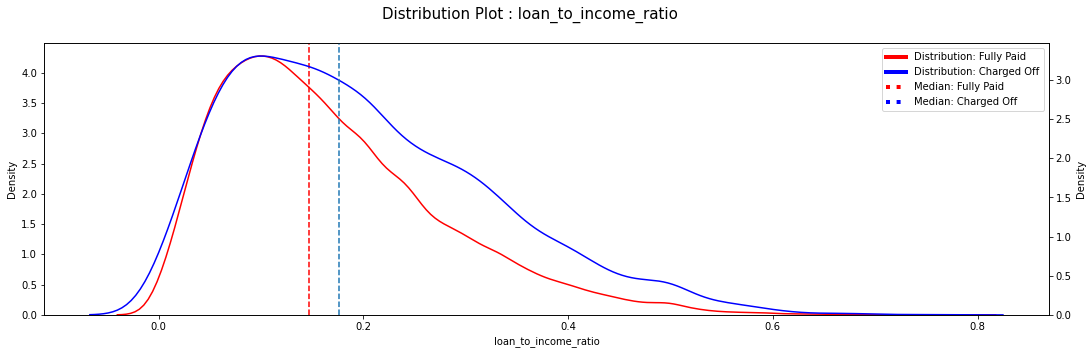

In [19]:
plot_distribution(df_preprocessed, "loan_to_income_ratio",)

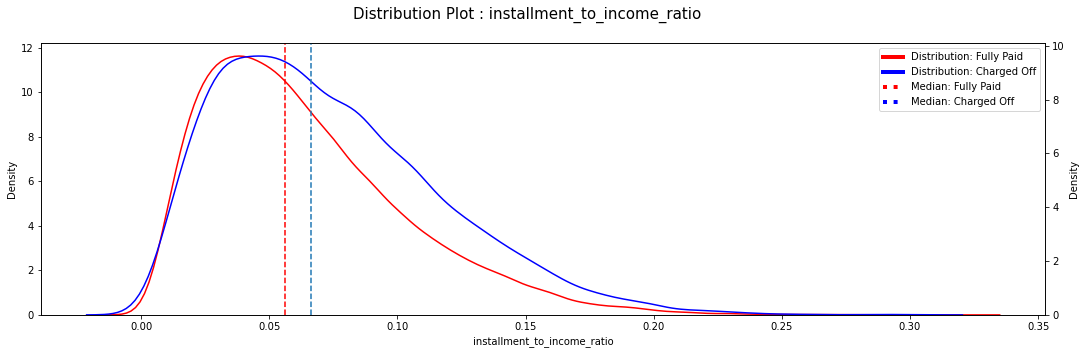

In [20]:
plot_distribution(df_preprocessed, "installment_to_income_ratio",)

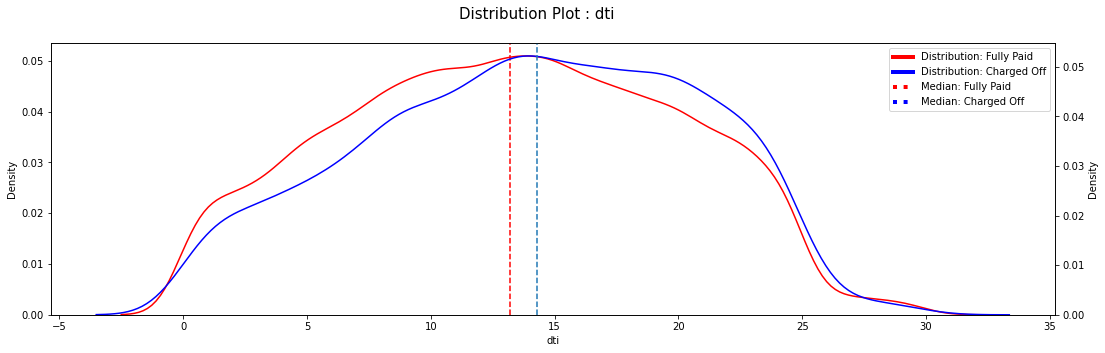

In [21]:
plot_distribution(df_preprocessed, "dti",)

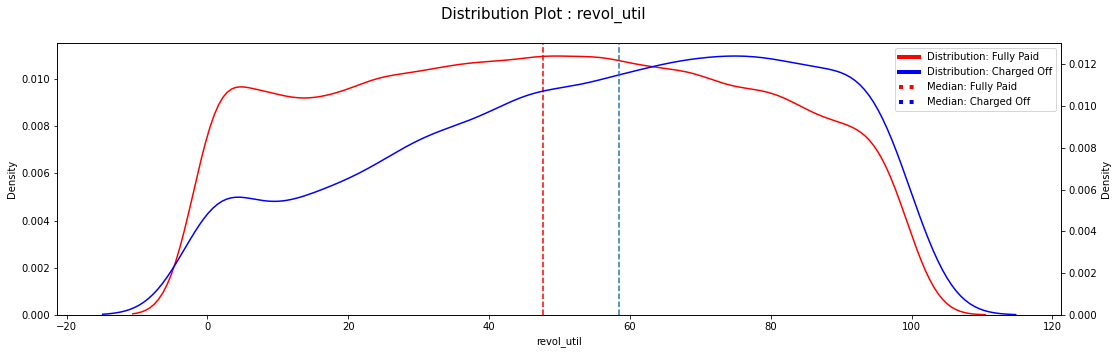

In [22]:
plot_distribution(df_preprocessed, "revol_util",)

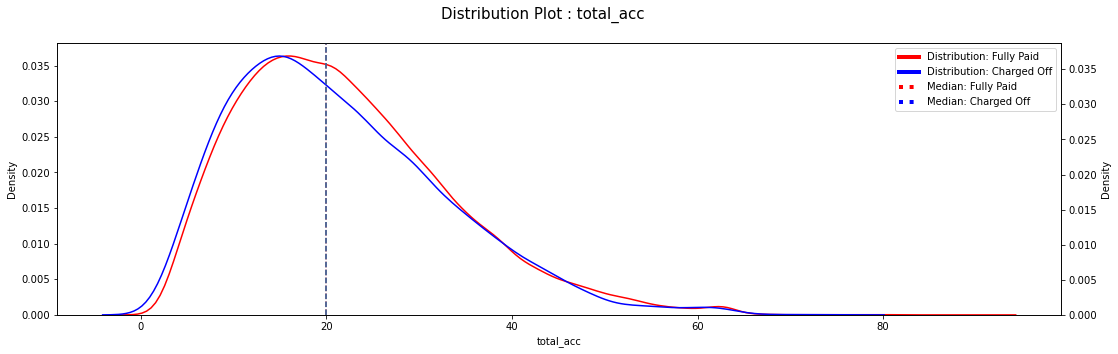

In [23]:
plot_distribution(df_preprocessed, "total_acc",)

<a id = 'chapter5.1.1'></a>

## Observation/Inference

- Applicants who defaulted on their loans had a higher median value of loan_to_income_ratio
- Applicants who defaulted on their loans had a higher median value of installment_to_income_ratio
- Applicants who defaulted on their loans had a significantly higher value of revol_util (which is a measure of the credit utilisation limit of the applicant)

[Go Back to Top](#top)

***

<a id = 'chapter5.2'></a>
## 5(ii). Bivariate Analysis: Boxplot Representation

In [24]:
def create_boxplot(data, x, y, hue = 'loan_status', figsize = (20, 5), sort = False):
    """Function for plotting boxpots
    """
    if sort:
        data = data.sort_values(by = x, ascending = True)
    plt.figure(figsize = figsize)
    sns.boxplot(data = data, x= x, y = y, hue = hue)
    plt.grid()
    plt.suptitle(f"Boxplot : {x} vs. {y}", fontsize = 20)
    plt.xticks(rotation = 10)
    plt.show()

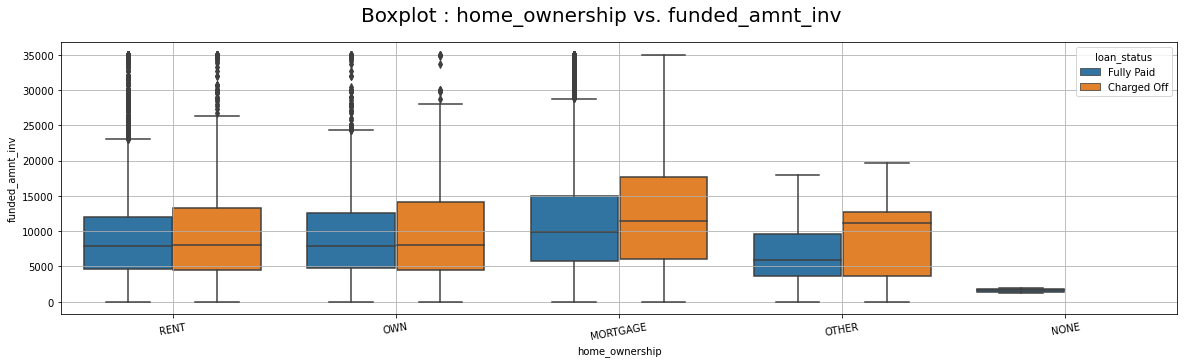

In [25]:
create_boxplot(data = df_preprocessed, x = 'home_ownership', y = 'funded_amnt_inv', hue = 'loan_status')

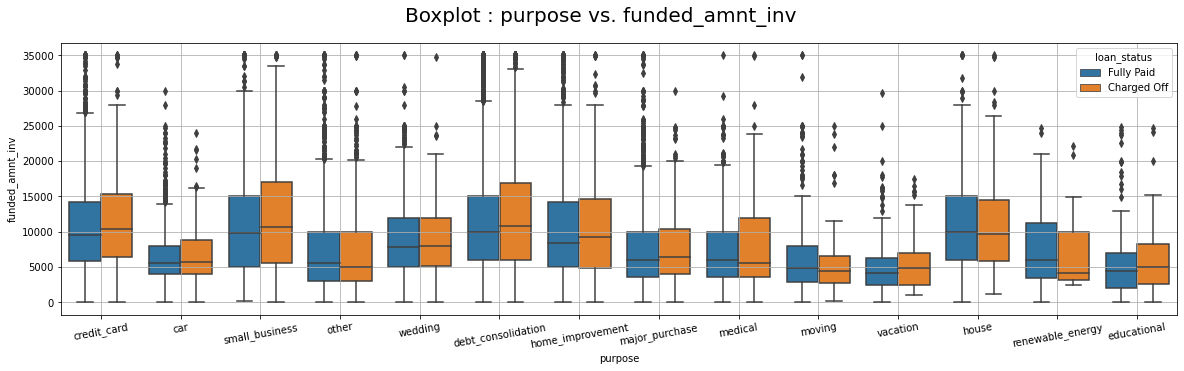

In [26]:
create_boxplot(data = df_preprocessed, x = 'purpose', y = 'funded_amnt_inv', hue = 'loan_status')

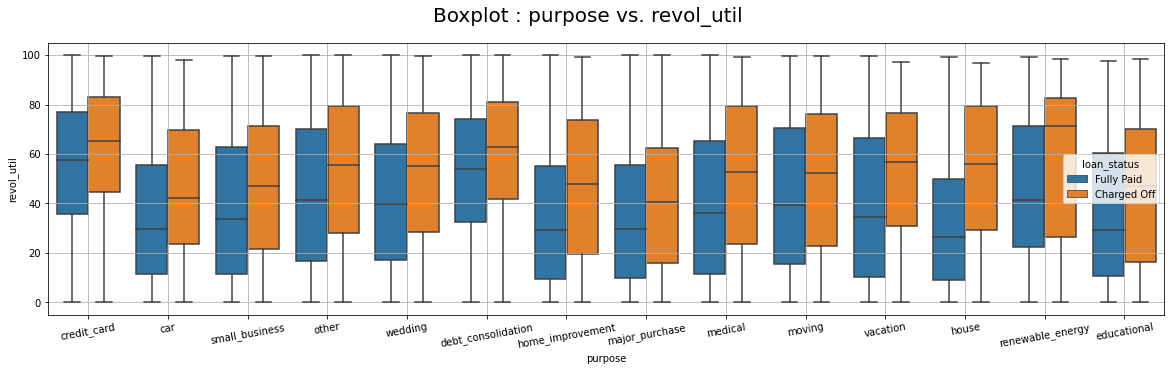

In [27]:
create_boxplot(data = df_preprocessed, x = 'purpose', y = 'revol_util', hue = 'loan_status')

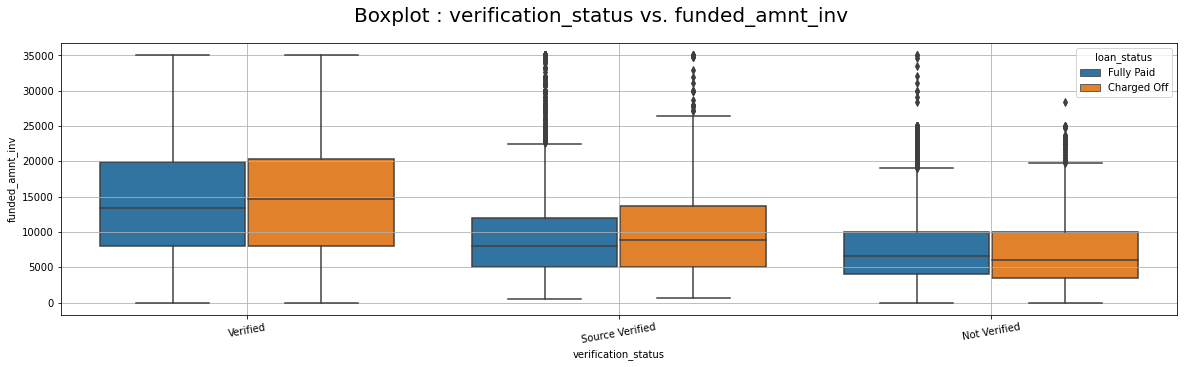

In [28]:
create_boxplot(data = df_preprocessed, x = 'verification_status', y = 'funded_amnt_inv', hue = 'loan_status')

<a id = 'chapter5.2.1'></a>

## Observations/Inference

- The distribution of 'defaulting' or 'Charge-Off' is more shifted towards higher values in the first plot for people with 'Mortgaged Homes'. This means that people with an existing Mortgage who applied for higher amount of loan were at a greater risk of defaulting.
- Similarly, from the second plot, people who applied for high amount of loan, for the purpose of business, debt-consolidation or credit-card were at a higher risk of defaulting.


[Go Back to Top](#top)

***

<a id = 'chapter5.3'></a>

## 5(iii) Bivariate Analysis: Boxplots with Binned Numberical Columns

In [29]:
def __helper__bin_data(data, bucket_column, multiplot_column):
    """Helper function for creating binned percentage count and total count data
    """
    if not multiplot_column:
        inc_columns = [bucket_column, "loan_status"]
        total_columns = [bucket_column]
        merge_columns = [bucket_column]
    else:
        inc_columns = [bucket_column, multiplot_column, "loan_status"]
        total_columns = [bucket_column, multiplot_column]
        merge_columns = [bucket_column, multiplot_column]
    df_inc = data.groupby(inc_columns, as_index = False).size()
    df_total = data.groupby(total_columns, as_index = False).size()
    df_inc_merged = df_inc.merge(df_total.rename(columns = {"size": "total_size"}), on = merge_columns, how = 'left')
    df_inc_merged['percentage_count'] = df_inc_merged['size']/df_inc_merged['total_size'] * 100
    return df_inc_merged


def __helper__dual_plot(data, binning_column, row, multiplot_column = None):
    """Helper function for creating side by side barplots, one with percentage count and other with total count
    """
    data = data.copy()
    if row == None:
        ax1 = axis1[0]
        ax2 = axis1[1]
    else:
        ax1 = axis2[row, 0]
        ax2 = axis2[row, 1]
    if multiplot_column:
        title_text = f"_{multiplot_column} = {data[multiplot_column].iloc[0]}"
    else:
        title_text = ""
#     print(ax1, ax2)
    data.pivot_table(index = 'bins', columns = "loan_status", values = "percentage_count").plot(kind = "bar", stacked = True, ax = ax1)
    sns.barplot(data = data, x = "bins", y = "size", hue = "loan_status", ax = ax2)
    
    ax1.set_title("Stacked Bar Plot: Percentage Count" + title_text)
    ax2.set_title("Side by Side Barplot: Absolute Count"+ title_text)
    
    ax1.set_xlabel(f"{binning_column} bins")
    ax2.set_xlabel(f"{binning_column} bins")
    
    ax1.set_ylabel("Percentage Count")
    ax2.set_ylabel("Count")
    
    ax1.legend(loc = "best")
    ax2.legend(loc = "best")
    
    ax1.tick_params(rotation = 25)
    ax2.tick_params(rotation = 25)


def plot_binned_data(data, 
                     binning_column, 
                     bins = 5, return_data = False, 
                     return_plots = True, multiplot_column = None, 
                     create_bins = True):
    """Function which creates side by side percentage count and absolute count of a categorical column with respect to the loan status
    If a numerical column is provided, it will create binned with respect to quantile cut (to ensure comparable number of observations under each bin)
    If a categorical column is provided (need create_bins = False), then it will straight away plot the barplots
    If a third categorical variable is provided (multiplot column), it will create similar barplots for each unique value of multiplot_column
    
    :args: data: pd.DataFrame() Input Data
    :args: binning_column: The column to create bins with
    :args: bins: Number of qcuts/bins; default = 5
    :args: return_data: Whether to return the binned data; default False
    :args: return_plots: Whether to display the plots or just return the data; default True
    :args: multiplot_column: Third variable for creating barplots for each unique value; default None
    :args: create_bins: Whether to create qcuts/bins , or use the existing categorical column; default True
    """
    data = data.copy()
    if create_bins:
        data['bins'] = pd.qcut(data[binning_column], q = bins)
        data_binned = __helper__bin_data(data, "bins", multiplot_column)
    else:
        data_binned = __helper__bin_data(data, binning_column, multiplot_column)
        data_binned = data_binned.rename({binning_column: 'bins'}, axis = 'columns')
        bins = df_preprocessed[binning_column].nunique()
    if return_plots:
        if multiplot_column == None:
            global axis1
            figure, axis1 = plt.subplots(1,2, figsize = (25, 5))
            
            plt.suptitle(f"Barplot: {binning_column} with {bins} bins", fontsize = 15)

            __helper__dual_plot(data_binned, binning_column, row = None)
        else:
            
            nrows = data_binned[multiplot_column].nunique()
            global axis2
            figure, axis2 = plt.subplots(nrows,2, figsize = (25, nrows * 8))
            plt.suptitle(f"Barplot: {binning_column} with {bins} bins", fontsize = 15)
            
            for index, value in enumerate(sorted(data_binned[multiplot_column].unique().tolist())):
                data_ = data_binned[data_binned[multiplot_column] == value]
                
                __helper__dual_plot(data_, binning_column, row = index, multiplot_column = multiplot_column)

        plt.show()
    if return_data:
        return data_binned
    


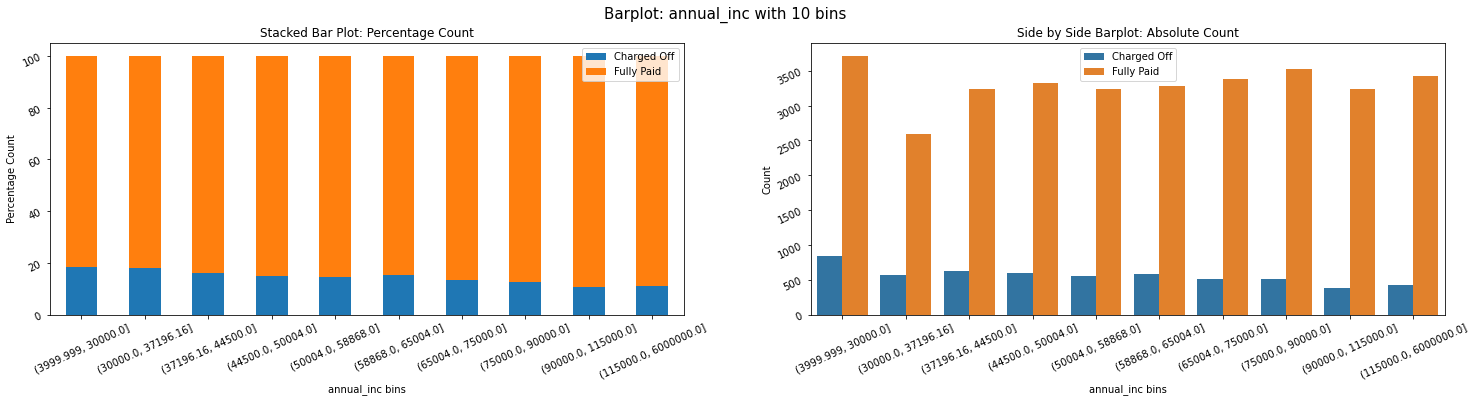

In [30]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "annual_inc")

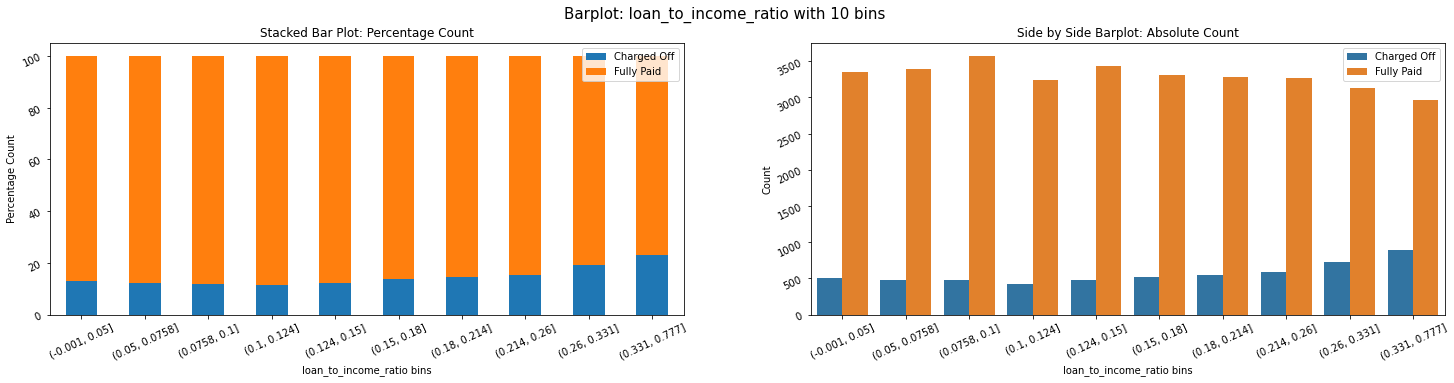

In [31]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "loan_to_income_ratio")

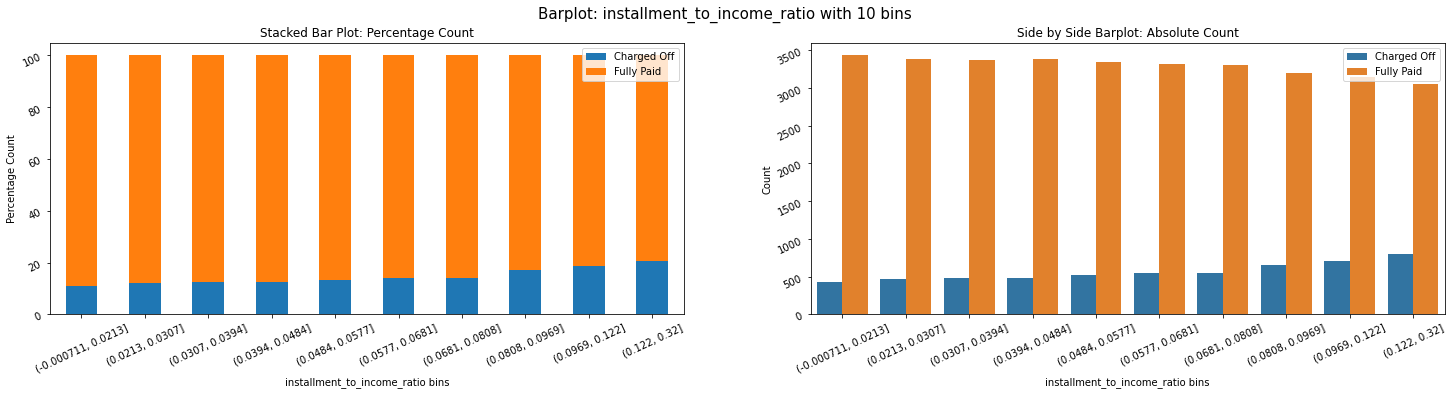

In [32]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "installment_to_income_ratio")

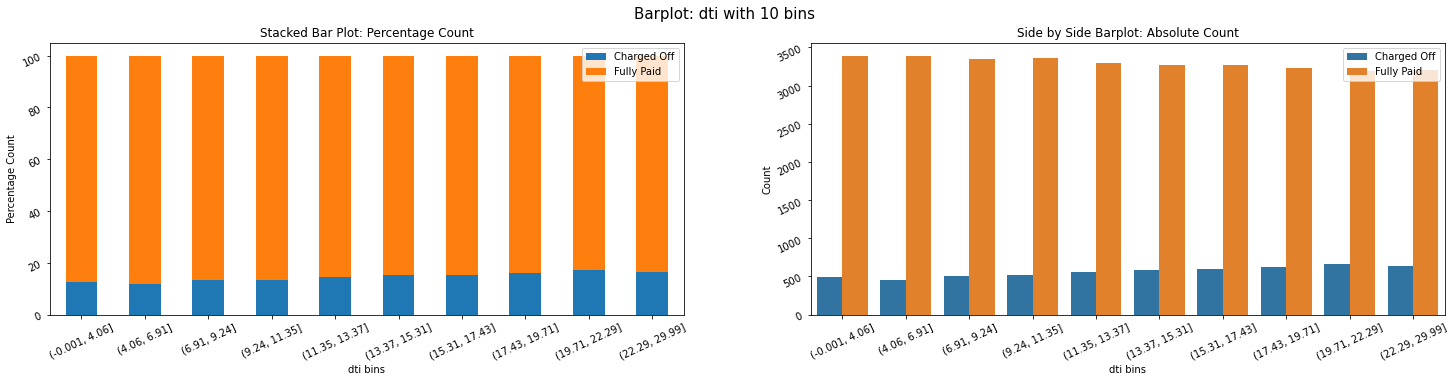

In [33]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "dti")

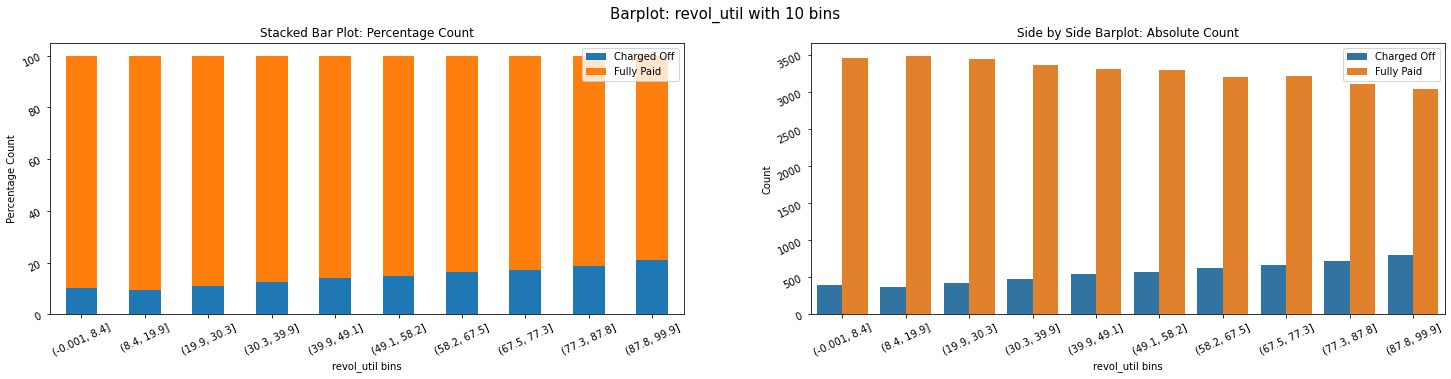

In [34]:
plot_binned_data(data = df_preprocessed, bins = 10, binning_column = "revol_util")

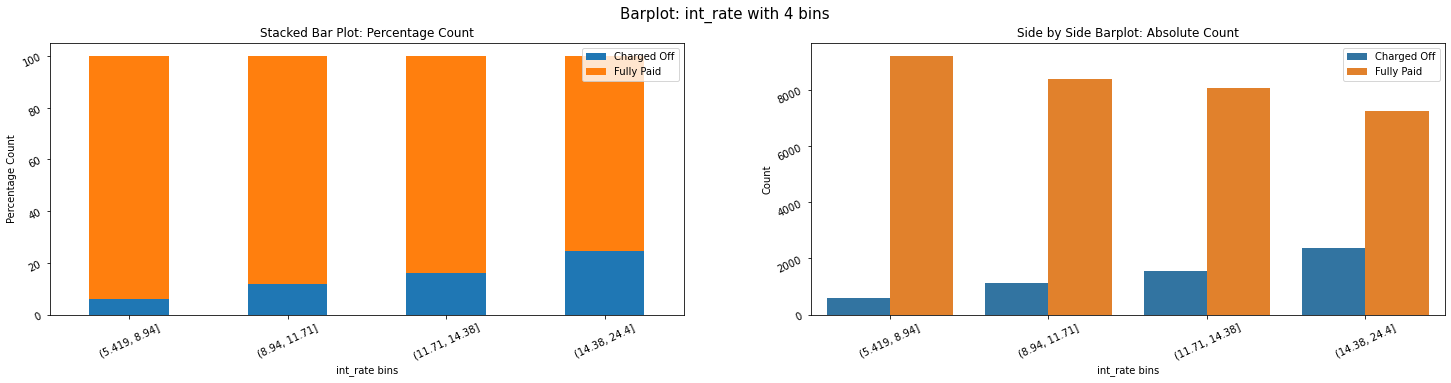

In [35]:
plot_binned_data(data = df_preprocessed, bins = 4, binning_column = "int_rate")

#### Create Custom Buckets for emp length, based on logical understanding

In [36]:
df_preprocessed['emp length bucket'] = np.where(df_preprocessed['emp_length'] < 2, "0-2yrs",
                                           np.where(df_preprocessed['emp_length'] < 4, "2-4yrs",
                                                   np.where(df_preprocessed['emp_length']< 6, "4-6yrs",
                                                           np.where(df_preprocessed['emp_length']< 8, "6-8yrs",
                                                                   np.where(df_preprocessed['emp_length']<10, "8-10yrs", "10+ yrs")))))

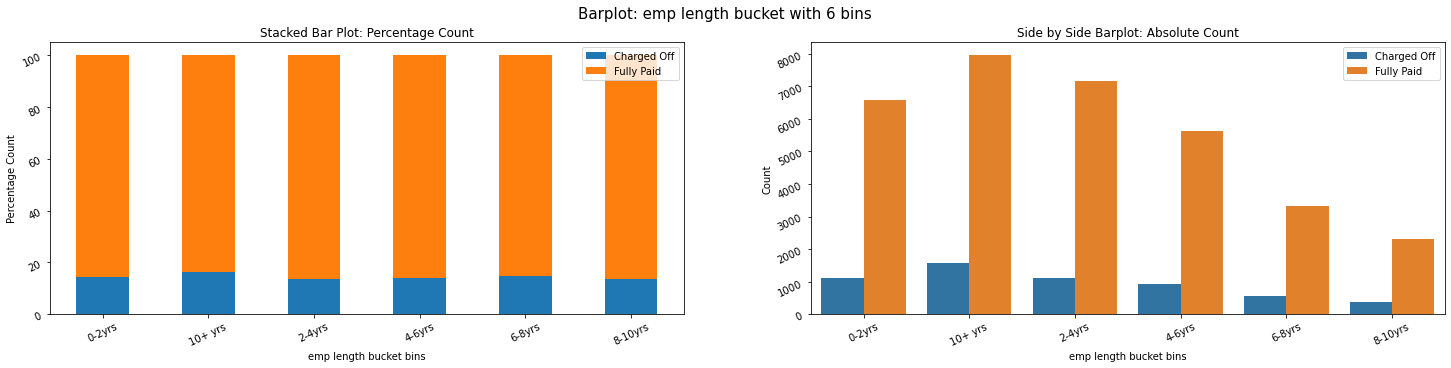

In [37]:
plot_binned_data(data = df_preprocessed, bins = None, binning_column = "emp length bucket", create_bins = False)

<a id = 'chapter5.4'></a>

## Observation and Inference

- Percentage of defaulting in historical data is more for:
    + Applicants with lower annual income. (4k-30k range)
    + Applicants with higher loan to income ratio (> 25% of annual income)
    + Applicants with higher installment to income ratio (>8% of monthly income)
    + Applicants with a higher credit utilisation rate ( >77% of total credit)
    + When the loan interest is more ( > 14% p.a)

[Go Back to Top](#top)

***

<a id = 'chapter6'></a>

# 6. Multivariate Analysis

**Objective:** Analysing the relationship of more than 2 variables

- Side-by-side Barplots for unique values of term
- Correlation Clustermap for assessing correlation between the independent variables

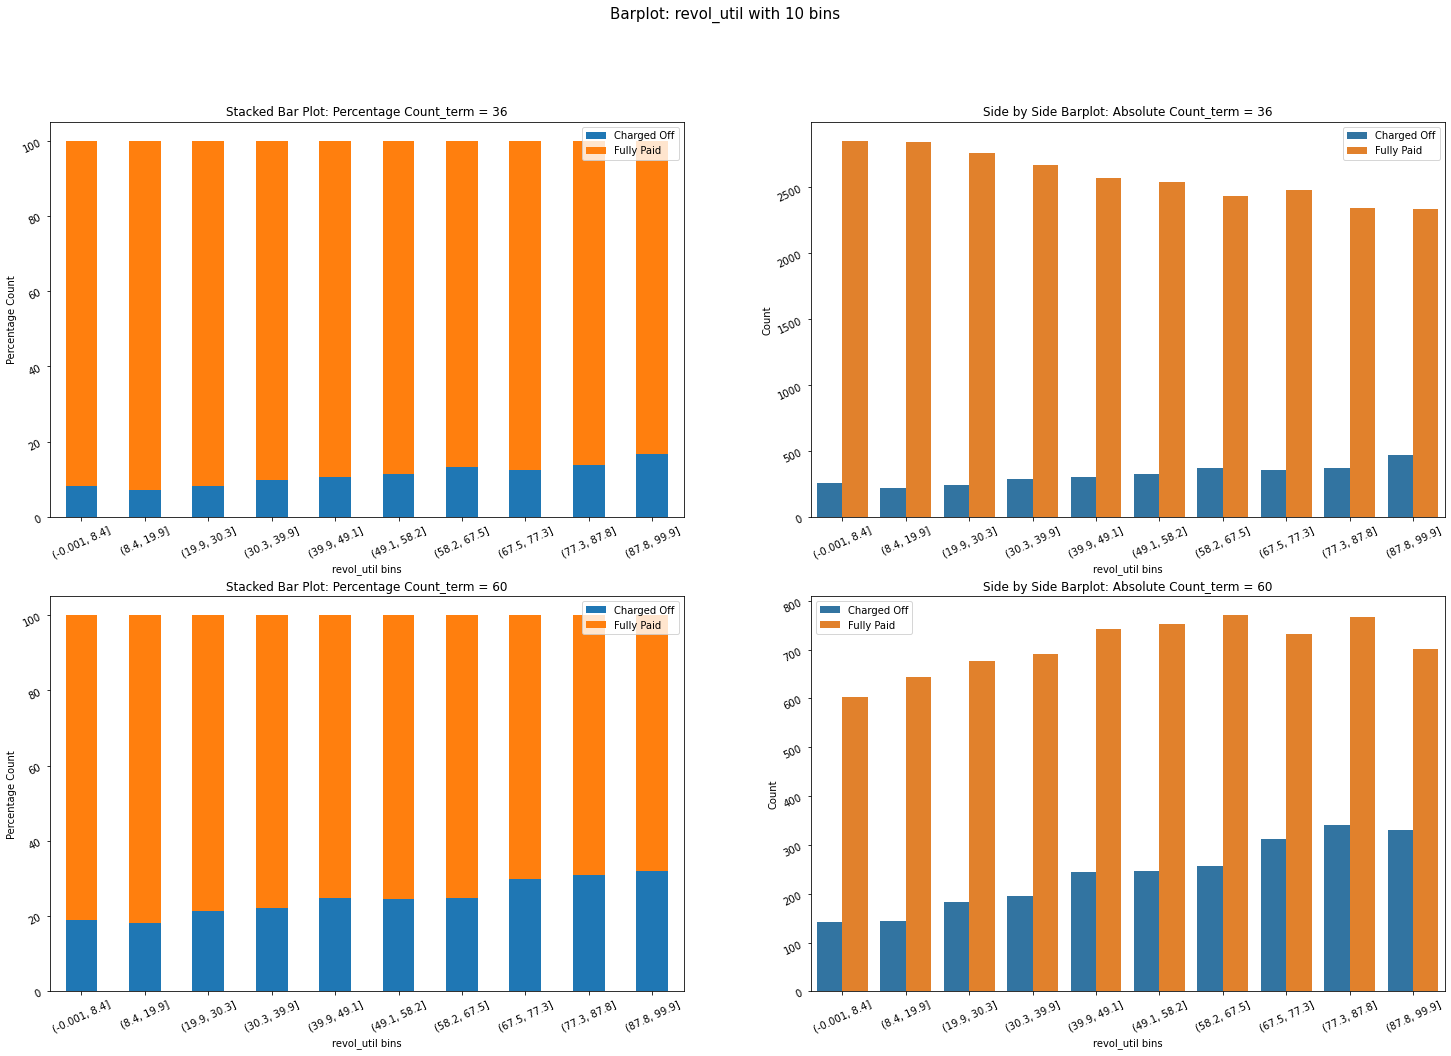

In [38]:
 plot_binned_data(df_preprocessed, binning_column = "revol_util", bins = 10, multiplot_column = "term",)

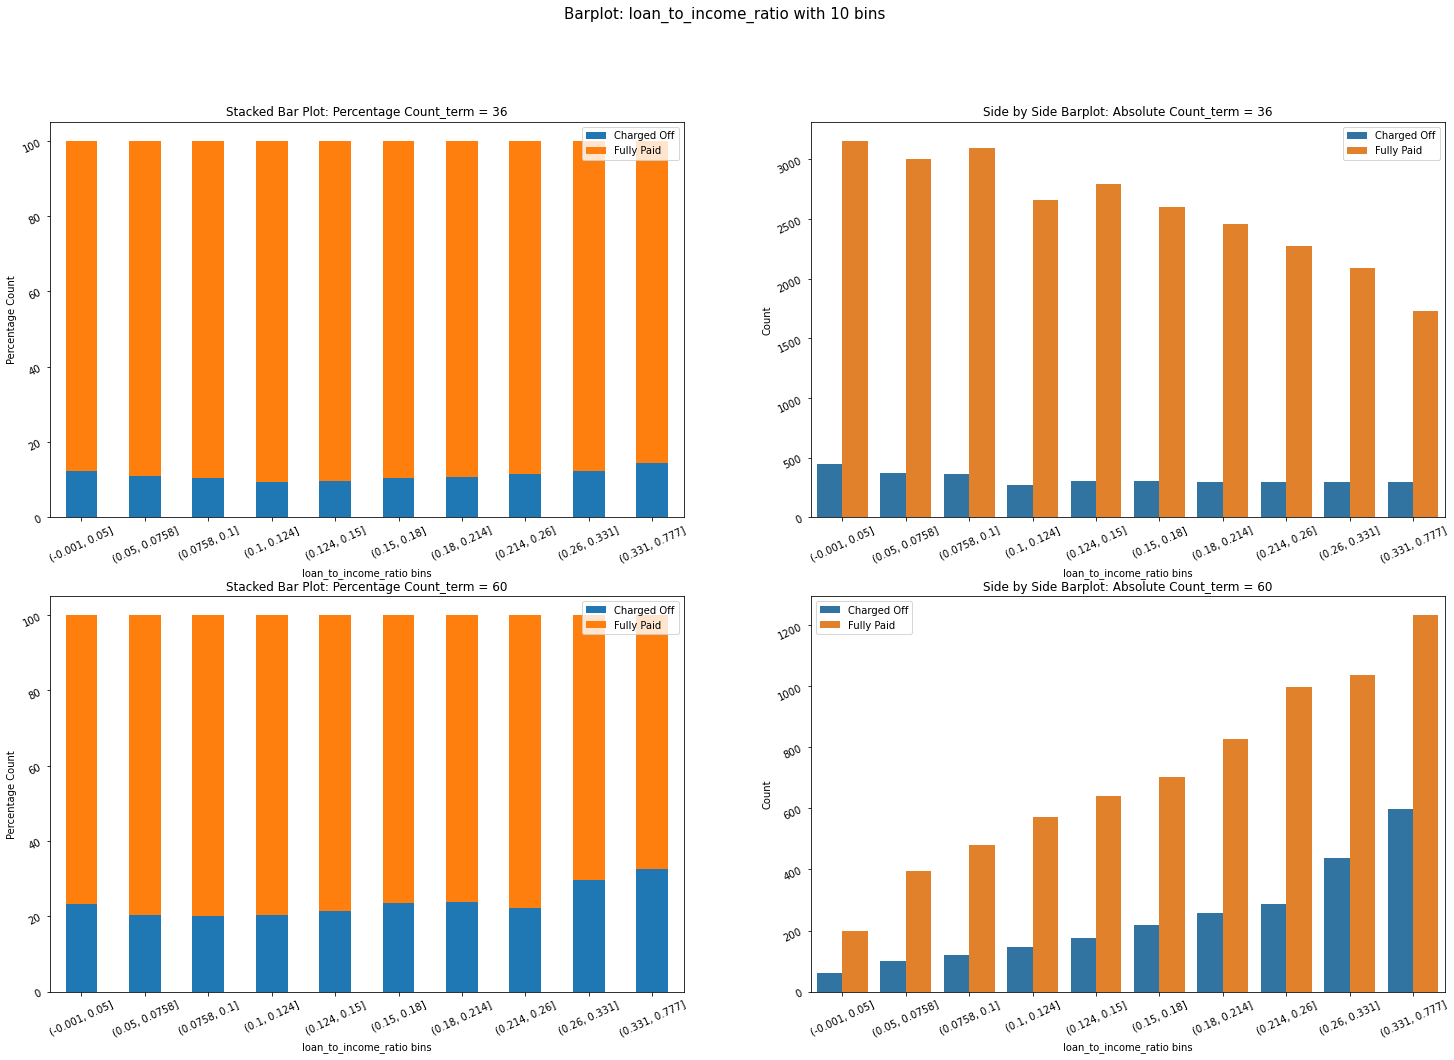

In [39]:
 plot_binned_data(df_preprocessed, binning_column = "loan_to_income_ratio", bins = 10, multiplot_column = "term",)

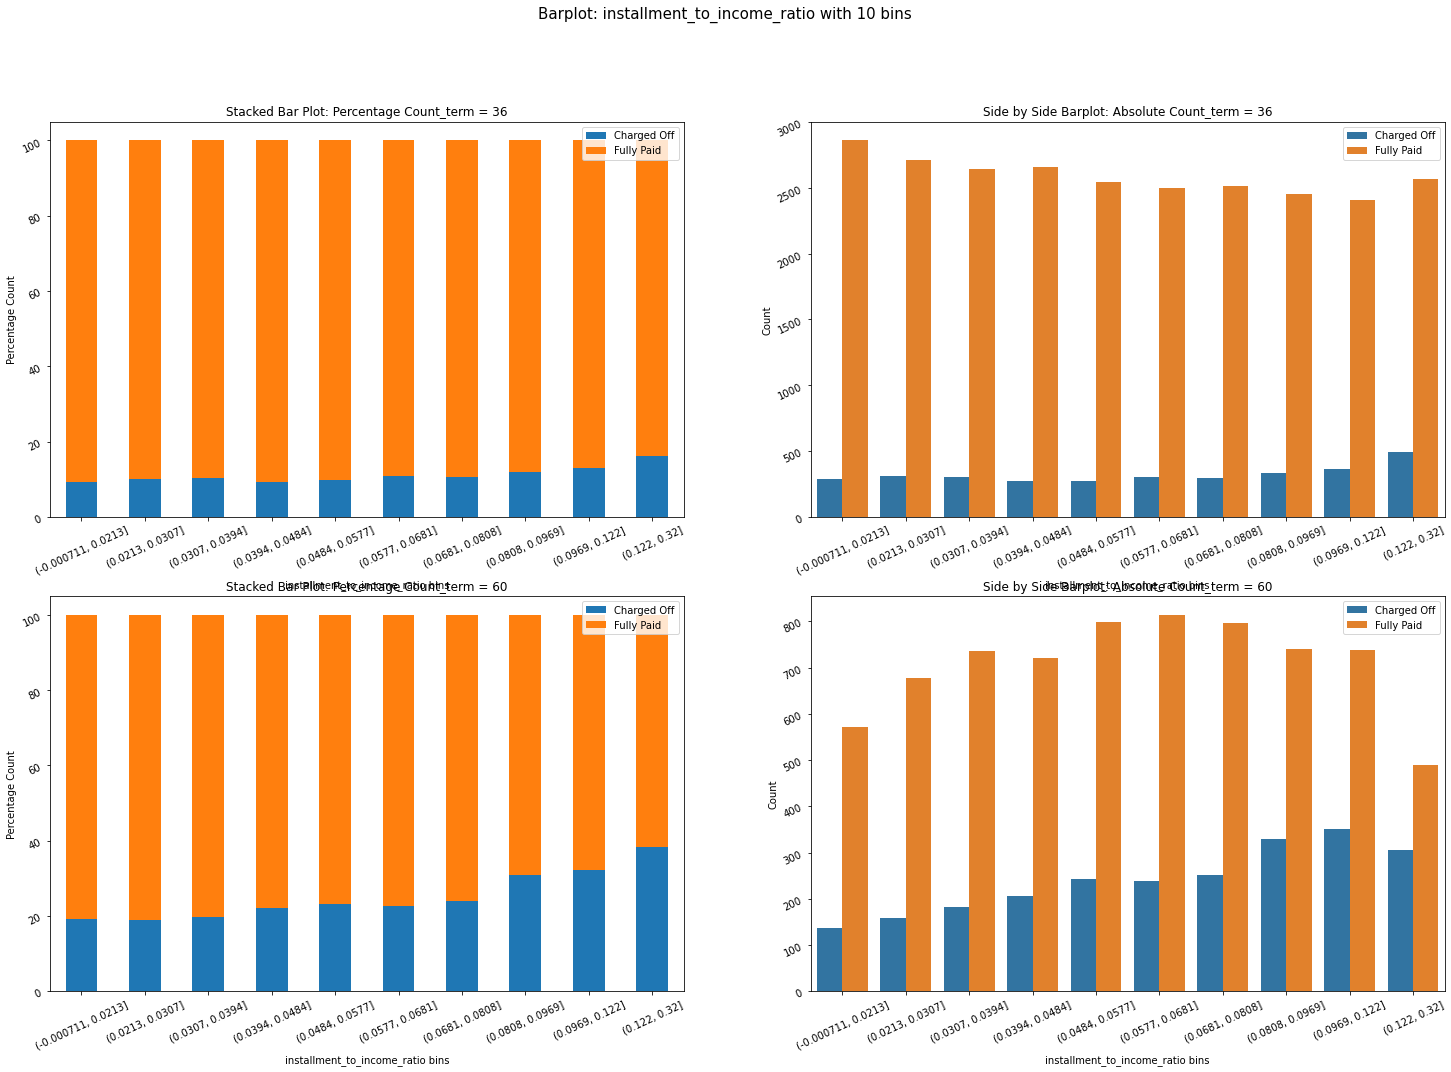

In [40]:
 plot_binned_data(df_preprocessed, binning_column = "installment_to_income_ratio", bins = 10, multiplot_column = "term",)

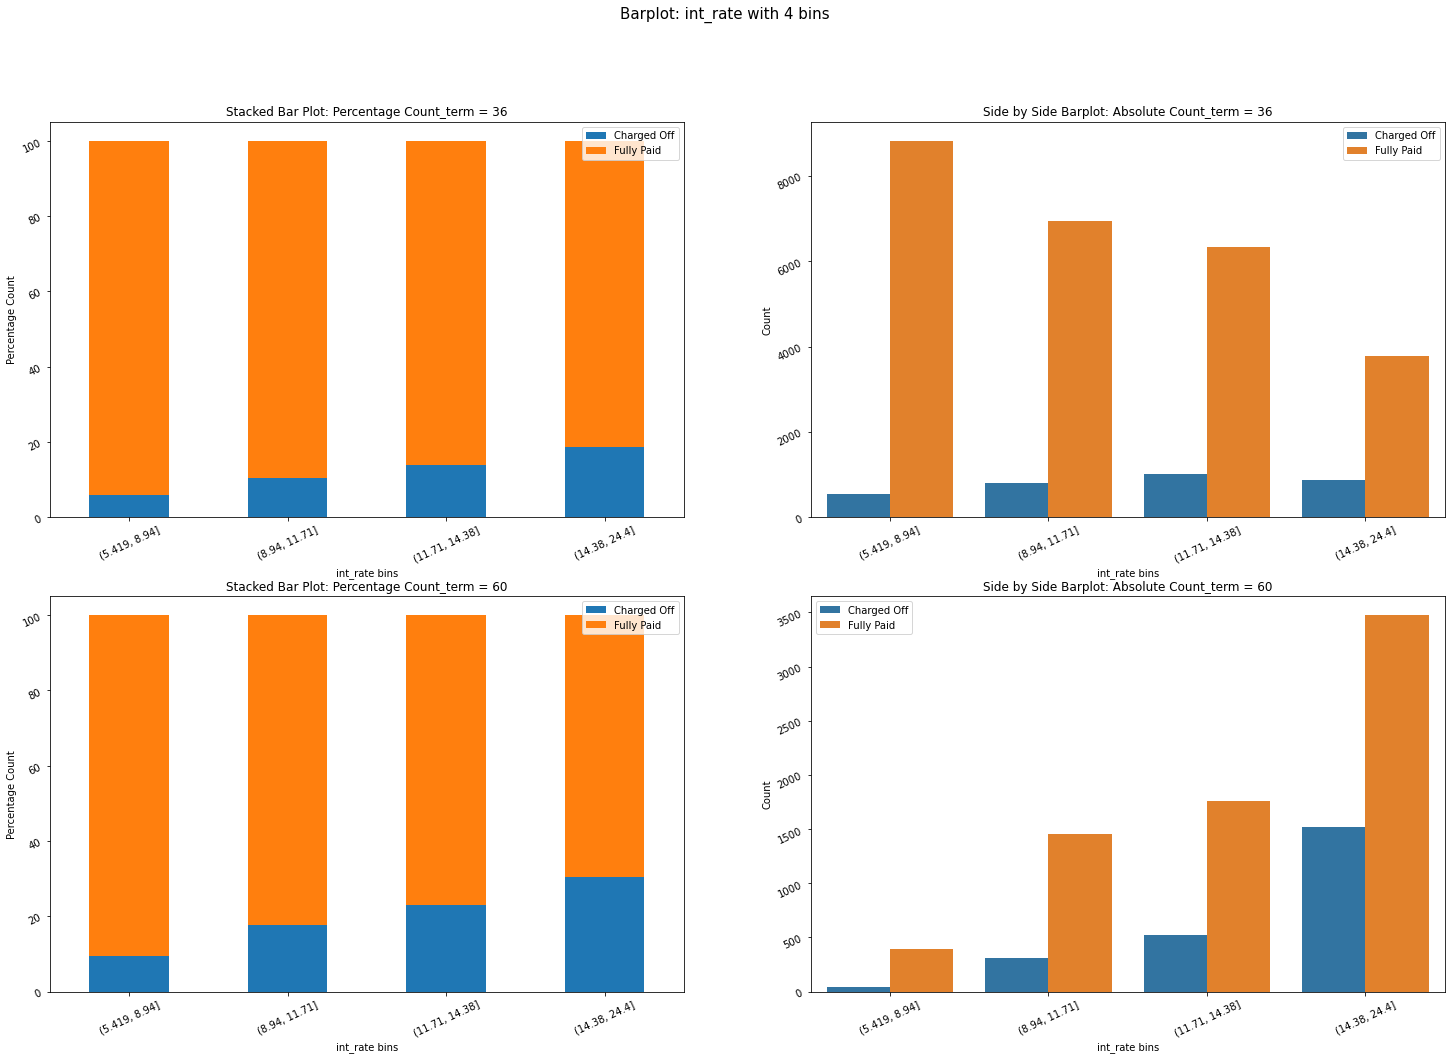

In [41]:
 plot_binned_data(df_preprocessed, binning_column = "int_rate", bins = 4, multiplot_column = "term",)

### Correlation ClusterMap

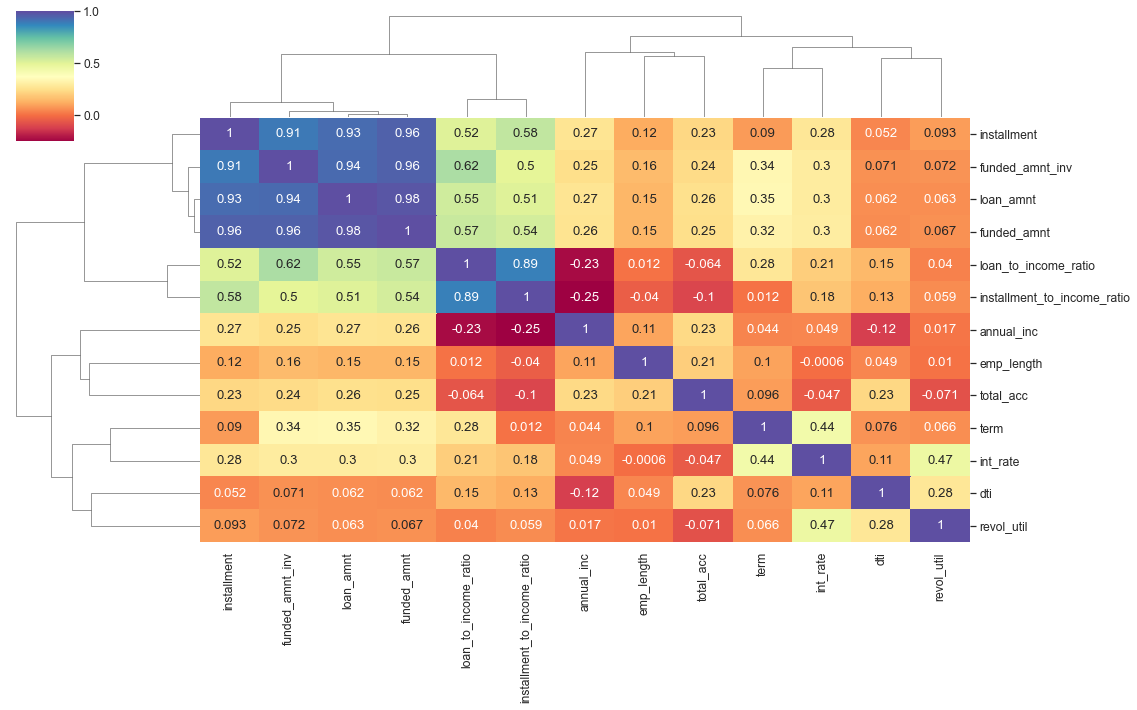

In [42]:
loan_correlation = df_preprocessed.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(16, 10),cmap="Spectral")
plt.show()

<a id = 'chapter6.2'></a>

## Observation and Inference

- Among all the probable driving factors, viz., loan_to_income_ratio, installment_to_income_ratio, interest_rate, dti, revol_util, the percentage of defaulting/charge off is more when the loans are lent out at a higher term of 60 months
- Correlation clustermap suggests some clustered relationships like 
    + (loan_amnt, funded_amnt, funded_amnt_inv) : high correlation as all these three values are essentially carrying similar information.
    + (loan_to_income_ratio, installment_to_income_ratio) : as both are derived from the similar two features.
    + moderately high correlation between int_rate and revol_util (0.47): People with high credit utilisation rate are given loans at a higher interest
    + term and int_rate (0.44): If we opt to pay off the loan at a higher term, then generally the interest rate offered is also more.

***
***

<a id = 'chapter7'></a>

# FINAL OBSERVATIONS AND INFERENCE

**Based on the Above Analysis, we can conclude that:**
    
- The Probability of Defaulting increases for applicants with a higher loan to income ratio (> 25% of their yearly income). 
- The Probability of Defaulting increases for applicants with a higher installment to income ratio (>9% of their monthly income)
- The Probability of Defaulting Increases for applicants with a Credit Utilisation Rate of greater than 0.77 (or 77%)
- A loan lent out at a higher term of 60 months has more probability of being defaulted
    + For applicants with more than 25% loan_to_income_ratio, the percentage of defaulting is around 30%
    + For applicants with installment amounts greater than 8% of their monthly income, the percentage of defaulting is 30-40%.
    + When the interest rate is more than 14%, the percentage of defaulting is around 30%
- Applicants who live on Rent or Mortgaged property have higher chances of defaulting when the loan amount is high.
- Applicants with purpose of loan as Small Business, Credit-Card loan or Debt Consolidation have higher chances of defaulting when the loan amount is high

[Go Back to Top](#top)